In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import fnmatch
import os
import geopandas as gpd
from os.path import exists

import rasterio as rio
from rasterio.plot import show
from rasterio.warp import transform_bounds
from rasterio.crs import CRS
from rasterio.mask import mask
import geopandas as gpd
import rioxarray as rxr
from shapely import wkt

from h3.utils.directories import get_data_dir
from h3.utils.directories import get_xbd_dir
from h3.dataprocessing.extract_metadata import load_and_save_df
from h3.dataprocessing.extract_metadata import filter_files

In [8]:
# Convert different damage classes (Joint Damage Scale) into integers
classes_dict = {
    "no-damage": 0,
    "minor-damage": 1,
    "major-damage": 2,
    "destroyed": 3,
    "un-classified": 4
}

data_dir = get_data_dir()
xbd_dir = get_xbd_dir()

path_to_file = os.path.join(
    data_dir,
    "datasets/processed_data/metadata_pickle",
    "metadata_posthurr_points_polygons_xy_lnglat.pkl")
file_exists = exists(path_to_file)

In [9]:
if file_exists is True:
    xbd_df = pd.read_pickle(path_to_file)
else:
    xbd_df = load_and_save_df()

xbd_tif_directory = os.path.join(xbd_dir, "geotiffs.old/hold/images")

tif_list = os.listdir(xbd_tif_directory)

post_tif_hurricane = filter_files(tif_list, "", "hurricane*pre*tif")
post_image_name = post_tif_hurricane[33].replace("tif", "png").replace("pre", "post")
print(post_image_name)
#image_name = tif_hurricane[23].replace("tif", "png")

post_image_path = os.path.join(xbd_tif_directory, post_tif_hurricane[33])
post_image_df = xbd_df.loc[xbd_df["image_name"] == post_image_name]
print(post_image_path)




pre_tif_hurricane = filter_files(tif_list, "", "hurricane*post*tif")
pre_image_name = pre_tif_hurricane[42].replace("tif", "png").replace("pre", "post")
print(pre_image_name)
#image_name = tif_hurricane[23].replace("tif", "png")

pre_image_path = os.path.join(xbd_tif_directory, pre_tif_hurricane[42])
pre_image_df = xbd_df.loc[xbd_df["image_name"] == pre_image_name]
print(pre_image_path)
    
#filtered_image_df = image_df[["polygon_xy", "point_xy", "damage_class",
#                             "image_name", "polygon_lnglat"]]

hurricane-matthew_00000371_post_disaster.png
/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-matthew_00000371_pre_disaster.tif
hurricane-florence_00000050_post_disaster.png
/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_data/geotiffs.old/hold/images/hurricane-florence_00000050_post_disaster.tif


In [36]:
pre_image_df

point_lnglat  \
12710   POINT (-77.8918610864061 34.56579633376702)   
12711  POINT (-77.89123542007351 34.56583036831216)   
12712  POINT (-77.89166333576543 34.56653871513746)   
12713   POINT (-77.89086627460026 34.5666727886742)   
12714  POINT (-77.89074927487353 34.56657697059196)   
12715  POINT (-77.89110567903089 34.56698921810182)   
12716   POINT (-77.8911352202209 34.56610328007869)   
12717  POINT (-77.89133512920837 34.56647710311005)   

                                          polygon_lnglat  \
12710  POLYGON ((-77.89187640769654 34.56588977453107...   
12711  POLYGON ((-77.89125807020551 34.56592097212, -...   
12712  POLYGON ((-77.89169966331241 34.56666696026628...   
12713  POLYGON ((-77.89093351826524 34.56682791894829...   
12714  POLYGON ((-77.8907614229044 34.56663335594814,...   
12715  POLYGON ((-77.89112899304794 34.56705984666156...   
12716  POLYGON ((-77.89118110029406 34.56616649620271...   
12717  POLYGON ((-77.8914433145126 34.56639476408954,...   

                                          point_xy  \
12710  POINT (342.3393523524452 349.5880221753868)   
12711  POINT (468.2051386580218 344.9271139945516)   
12712  POINT (387.2103241228614 170.5306242257065)   
12713  POINT (548.1851166386728 142.5734693172341)   
12714  POINT (571.0112076444306 166.5040773103403)   
12715  POINT (502.3157940737011 64.39045474186069)   
12716   POINT (490.222557969227 279.2607963283508)   
12717  POINT (452.6825902666988 187.3739972770785)   

                                                geometry damage_class  \
12710  POLYGON ((339.913 326.819, 359.957 335.172, 35...            2   
12711  POLYGON ((464.287 322.805, 491.166 352.889, 47...            0   
12712  POLYGON ((380.808 139.193, 401.070 140.207, 39...            2   
12713  POLYGON ((535.762 104.532, 569.558 111.663, 57...            1   
12714  POLYGON ((568.964 152.748, 578.133 154.353, 57...            1   
12715  POLYGON ((498.126 47.113, 514.585 50.993, 505....            3   
12716  POLYGON ((481.450 263.653, 506.025 267.773, 50...            1   
12717  POLYGON ((430.387 206.737, 436.064 161.746, 44...            2   

            disaster_name                                     image_name  \
12710  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12711  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12712  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12713  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12714  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12715  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12716  hurricane-florence  hurricane-florence_00000050_post_disaster.png   
12717  hurricane-florence  hurricane-florence_00000050_post_disaster.png   

                    capture_date  
12710  2018-09-20 16:04:41+00:00  
12711  2018-09-20 16:04:41+00:00  
12712  2018-09-20 16:04:41+00:00  
12713  2018-09-20 16:04:41+00:00  
12714  2018-09-20 16:04:41+00:00  
12715  2018-09-20 16:04:41+00:00  
12716  2018-09-20 16:04:41+00:00  
12717  2018-09-20 16:04:41+00:00

In [8]:
%%capture
post_image_df.plot(column="damage_class")

In [6]:
from PIL import Image

post label on post image


[10:26:40] DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87a0f179d0>                    ]8;id=698923;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=699714;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=607195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=191546;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=805721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=68464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87a0f17a60> created        ]8;id=510091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=700395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=316102;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=254016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=691590;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=897561;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87a0f17a60>.              ]8;id=609252;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=546147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87a0f179d0>                     ]8;id=404830;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=411336;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Sharing flag: 0                                                                 ]8;id=207073;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=161090;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

[10:26:41] DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=340624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=337786;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=80917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=217865;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=88602;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=296053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Dataset <open DatasetReader                                                     ]8;id=331074;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=157117;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\
                    name='/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_da                
                    ta/geotiffs.old/hold/images/hurricane-matthew_00000371_pre_disaster.tif'                       
                    mode='r'> is started.                                                                          

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87a0f179d0>                     ]8;id=764193;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=568614;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87a0f17a60> options            ]8;id=621190;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=271730;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87a0f17a60>.                    ]8;id=962053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=468282;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=952109;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=510994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87a0f179d0>                      ]8;id=559880;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=422304;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87b41e27d0>                    ]8;id=174394;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=187378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=762550;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=506497;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=837829;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=611437;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87a0f17a60> created        ]8;id=566315;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=986993;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=930725;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=804576;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=592376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=471270;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87a0f17a60>.              ]8;id=445599;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=952201;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87b41e27d0>                     ]8;id=383862;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=548914;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=641338;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=649010;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/pyplot.py#295\295]8;;\

           DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.         ]8;id=955466;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=691072;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/pyplot.py#295\295]8;;\

           DEBUG    findfont: Matching                                                         ]8;id=608488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=232346;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1329\1329]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=888305;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=814952;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf',                     
                     name='DejaVu Sans', style='oblique', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 1.335                                                    

           DEBUG    findfont:                                                                  ]8;id=332231;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779963;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',                              
                    name='STIXNonUnicode', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=29914;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=591021;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',                             
                    name='STIXGeneral', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=23663;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=936861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=640151;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710225;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=4450;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=465049;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',                             
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=230879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544745;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=451183;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=220470;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=964528;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=570240;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',                            
                    name='DejaVu Sans', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=823930;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',                     
                     name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=254611;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123990;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=996406;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=30149;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                          
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=900863;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=919921;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',                         
                    name='DejaVu Serif Display', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=89180;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=918171;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185614;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',                           
                    name='DejaVu Serif', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=578519;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61595;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=61897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335024;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=857311;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=721471;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',                         
                    name='DejaVu Sans', style='oblique', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 1.05                                                     

           DEBUG    findfont:                                                                  ]8;id=404502;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=881109;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',                         
                    name='DejaVu Serif', style='italic', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=385106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1455;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=71369;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=806058;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf',                                
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=25514;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=396739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=697976;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786598;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=303677;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201980;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=965084;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=575284;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',                              
                    name='STIXNonUnicode', style='italic', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=832255;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=136649;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',                          
                    name='DejaVu Sans Display', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=95290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611784;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',                                
                    name='STIXGeneral', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=279204;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404133;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',                        
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=432827;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=338438;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=754113;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=783281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',                                 
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=431461;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11380;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',                     
                     name='DejaVu Serif', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=195325;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132027;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=795250;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257390;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=510688;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171685;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',                                 
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=168695;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992630;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.t                     
                    tf', name='DejaVu Sans Mono', style='oblique', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=364428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=922544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',                           
                    name='STIXNonUnicode', style='italic', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=905873;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720653;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=214941;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=566025;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.t                     
                    tf', name='Party LET', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=745077;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142886;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=921168;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419692;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-                     
                    Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=809615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=71629;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolia                     
                    n-Regular.ttf', name='Noto Sans Mongolian', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=709836;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=997393;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W1.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=429119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=576091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 8 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=509800;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237680;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf',                        
                    name='Georgia', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=858327;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990131;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi                             
                    MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold.ttf', ]8;id=152071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7540;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=700,                                    
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next         ]8;id=137145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801784;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed.ttc', name='Avenir Next Condensed', style='normal',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=771546;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880869;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc',                          
                    name='Farah', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=417144;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410868;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic                     
                    -Regular.ttf', name='Noto Sans Ugaritic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas.ttf',   ]8;id=550732;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=124408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Consolas', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana Bold     ]8;id=358759;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=376695;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=36639;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=320899;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf',                        
                    name='STIXVariants', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=489233;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776313;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal',                     
                    weight=400, stretch='condensed', size='scalable')) = 11.25                                     

           DEBUG    findfont:                                                                  ]8;id=143997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=204433;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam                            
                    MN.ttc', name='Malayalam MN', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=712032;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979890;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Times New Roman', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', ]8;id=525069;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475795;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Symbols', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=55769;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc',                          
                    name='Didot', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=296477;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307810;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc',                        
                    name='Papyrus', style='normal', variant='normal', weight=400,                                  
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=179504;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792728;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=974835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=550576;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W8.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=800, stretch='normal', size='scalable')) = 10.43                                        

           DEBUG    findfont:                                                                  ]8;id=62162;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=791056;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawad                     
                    i-Regular.ttf', name='Noto Sans Khudawadi', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=579970;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241987;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermi                     
                    c-Regular.ttf', name='Noto Sans Old Permic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

[10:26:42] DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/taile.ttf',      ]8;id=541166;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=450623;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=209918;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc'                     
                    , name='Copperplate', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=550546;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449286;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewrit                     
                    er.ttc', name='American Typewriter', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc',        ]8;id=444445;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Optima', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=788364;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597435;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf',                        
                    name='Mishafi', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=250362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=805264;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU-ExtB.ttf',                             
                    name='MingLiU-ExtB', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=549744;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=34015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Alternate Bold.ttf', name='DIN Alternate', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc',      ]8;id=384987;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=873006;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Kohinoor Devanagari', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=736615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463379;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=200755;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230614;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=669029;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=184996;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Calibri', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=641773;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76876;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=874825;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=568839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-                     
                    Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU.ttf',    ]8;id=187042;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MingLiU', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=58104;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374982;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New        ]8;id=42329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960675;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Roman.ttf', name='Times New Roman', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=556023;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291108;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=117455;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785766;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa                     
                    -Regular.ttf', name='Noto Sans Tagbanwa', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua Bold    ]8;id=643656;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651854;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', ]8;id=770380;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=989307;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Braille', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc',       ]8;id=842910;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=650876;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Courier', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/TaiLeb.ttf',     ]8;id=108422;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412150;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria.ttf',    ]8;id=853703;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343581;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Cambria', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=650486;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547305;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-R                     
                    egular.ttf', name='Noto Sans Lycian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=878852;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346220;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-                     
                    Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=558931;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201520;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=728841;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=537033;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=133082;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698563;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf',                     
                    name='Herculanum', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=566378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=359057;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand                         
                    Bold.ttf', name='Bradley Hand', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=400347;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546675;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.ot                     
                    f', name='STIXNonUnicode', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=931737;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621800;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc',                     
                    name='Kannada MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc',  ]8;id=719819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=940149;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Lucida Grande', style='normal', variant='normal', weight=500,                            
                    stretch='normal', size='scalable')) = 2.872272727272727                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=81592;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231667;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=984917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=116566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc',                         
                    name='Nadeem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=795164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158095;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh                     
                    -Regular.ttf', name='Noto Sans Tifinagh', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=418545;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=509288;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=10210;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194423;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterP                     
                    ahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=306629;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=209249;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W6.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=600, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=661486;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=978464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans Serif.ttf', name='MS Reference Sans Serif', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝        ]8;id=845859;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal',                      
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', ]8;id=7836;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Heiti TC', style='normal', variant='normal', weight=300,                                 
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=564566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429932;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regu                     
                    lar.ttf', name='Noto Sans Mro', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=903434;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716240;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal',                     
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=732005;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=474996;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf',                        
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Bookshelf Symbol ]8;id=606053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234949;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    7.ttf', name='Bookshelf Symbol 7', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua.ttf',   ]8;id=841502;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96038;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Perpetua', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc',      ]8;id=167442;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627268;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geeza Pro', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=658390;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=580484;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regu                     
                    lar.ttf', name='Noto Sans NKo', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=946677;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924190;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-                     
                    Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas Bold    ]8;id=135492;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751982;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=152518;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=149720;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=1534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990999;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymRe                     
                    g.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/monbaiti.ttf',   ]8;id=824174;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725400;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mongolian Baiti', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=471739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319030;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book.ttf', name='Franklin Gothic Book', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=22343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863722;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regu                     
                    lar.ttf', name='Noto Sans Vai', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=287532;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735108;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=795532;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377220;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf',                        
                    name='Zapfino', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/msyi.ttf',       ]8;id=560874;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=953972;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Marlett.ttf',    ]8;id=995046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=372709;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marlett', style='normal', variant='normal', weight=500,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=677846;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=55665;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc',                         
                    name='Futura', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=567678;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812520;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese                     
                    -Regular.otf', name='Noto Sans Javanese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=60680;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc',                            
                    name='Kohinoor Gujarati', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=24397;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=926788;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf',    ]8;id=109023;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790993;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=844409;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=415534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Arial', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 7.698636363636363                            

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=320172;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725650;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Black.ttf', name='Arial Black', style='normal', variant='normal',                              
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=944141;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=44329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc',      ]8;id=948054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=797188;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Palatino', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=37600;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723115;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf',                            
                    name='.SF Compact Rounded', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=109027;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=452301;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymR                     
                    eg.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=727496;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=64194;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed Bold.ttf', name='DIN Condensed', style='normal',                                     
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=111858;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=930681;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-                     
                    Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=906349;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154444;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/mingliu_hkscs.ttf',                            
                    name='MingLiU_HKSCS', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=777809;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=919467;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book Italic.ttf', name='Franklin Gothic Book', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=358360;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=898822;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU-ExtB.ttf',                            
                    name='PMingLiU-ExtB', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf',        ]8;id=331338;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240851;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Unicode MS', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=723571;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=255218;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf',                         
                    name='Farisi', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=158989;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726026;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc',    ]8;id=809079;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marker Felt', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=643323;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877479;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-                     
                    Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc',       ]8;id=860988;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=297751;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Hebrew', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=813901;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528090;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=841951;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=516707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf'                     
                    , name='Chalkduster', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=461977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836451;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc',                        
                    name='Charter', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=302239;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamarita                     
                    n-Regular.ttf', name='Noto Sans Samaritan', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=399096;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=129420;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf',                      
                    name='Krungthep', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=333917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=961319;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet                            
                    MS.ttf', name='Trebuchet MS', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=725687;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680351;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold Italic.ttf', name='Palatino Linotype', style='italic',                           
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=618392;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=313626;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc',                       
                    name='Shree Devanagari 714', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia.ttf', ]8;id=578378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=515136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Constantia', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=958267;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689058;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-R                     
                    egular.ttf', name='Noto Sans Wancho', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=811858;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133603;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=400396;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=540970;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=231388;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymB                     
                    ol.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=396397;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823160;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf',                         
                    name='Tahoma', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=332783;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=177856;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=257204;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856561;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf',                       
                    name='Ayuthaya', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=974981;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278758;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=815164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261080;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans                       
                    Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=219465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc',                           
                    name='Muna', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=747308;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-R                     
                    egular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=70536;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844620;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=595103;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=492677;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.tt                     
                    c', name='DecoType Naskh', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Batang.ttf',     ]8;id=98674;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Batang', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=156400;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778370;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=549725;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823353;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Gill Sans MT', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=130965;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291478;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Reg                     
                    ular.ttf', name='Noto Sans Miao', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=145994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586650;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc',                        
                    name='Corsiva Hebrew', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo Bold      ]8;id=624166;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=944282;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc',         ]8;id=120548;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=926593;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Menlo', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=652478;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=940538;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifAhom-Re                     
                    gular.ttf', name='Noto Serif Ahom', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=807091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=354961;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-                     
                    Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=772146;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698577;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf',                        
                    name='Kokonor', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial            ]8;id=761657;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=55412;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=867573;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578639;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptian                     
                    Hieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=928884;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428545;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=637703;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960919;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam                       
                    MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', ]8;id=26781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=887775;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica Neue', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=751796;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524574;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-R                     
                    egular.ttf', name='Noto Sans Thaana', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=175816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196747;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Math.ttf', name='Cambria Math', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=573745;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844137;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=358242;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc'                     
                    , name='Baskerville', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=816487;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=35731;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneifor                     
                    m-Regular.ttf', name='Noto Sans Cuneiform', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc',  ]8;id=329519;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191599;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=982506;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=761943;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.ot                     
                    f', name='STIXNonUnicode', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=357633;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=975863;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc',                       
                    name='Mshtakan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Brush            ]8;id=478503;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132191;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=690035;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=653704;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tw Cen MT', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=70424;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=454663;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-R                     
                    egular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara.ttf',    ]8;id=581086;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181232;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Candara', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=739156;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=732664;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc',                     
                    name='Sinhala MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=458805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83327;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperial                     
                    Aramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal',                       
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=99831;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726033;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-                     
                    Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=219587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=609527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHunga                     
                    rian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti             ]8;id=816570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=367285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttc', name='Heiti TC', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=482136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=210382;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc',                         
                    name='Galvji', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=396848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersi                     
                    an-Regular.ttf', name='Noto Sans Old Persian', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=854350;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal',                       
                    weight=700, stretch='condensed', size='scalable')) = 10.535                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT Bold   ]8;id=631657;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1727;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=480384;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=153555;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc',                              
                    name='Kohinoor Telugu', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT.ttf',  ]8;id=911048;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757892;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Tw Cen MT', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=621546;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482382;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetChero                     
                    kee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=822636;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855973;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-                     
                    Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=759589;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=552573;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc',                        
                    name='Baghdad', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=793921;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=244483;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Meiryo', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=806428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=129307;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc                     
                    ', name='Devanagari MT', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=140844;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275126;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=573174;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862998;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-R                     
                    egular.ttf', name='Noto Sans Rejang', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=253033;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta                     
                    .otf', name='STIXNonUnicode', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=913740;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=929627;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah                     
                    -Regular.ttf', name='Noto Sans Bassa Vah', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=772391;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974718;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-                     
                    Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=364037;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=394358;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Times New Roman', style='normal', variant='normal',                           
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=825702;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125496;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam                      
                    MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=676587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=692995;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Specialty.ttf', name='MS Reference Specialty', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=853322;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=678343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani                     
                    -Regular.ttf', name='Noto Sans Mahajani', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=281160;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=822332;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari                           
                    Sangam MN.ttc', name='Devanagari Sangam MN', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida           ]8;id=503622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=523871;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Console.ttf', name='Lucida Console', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PGothic.ttf', ]8;id=176750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187950;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PGothic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=248657;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610663;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.t                     
                    tc', name='Snell Roundhand', style='normal', variant='normal', weight=500,                     
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=4437;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=877972;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.o                     
                    tf', name='STIXGeneral', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=55659;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=982749;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=695785;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=203562;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.tt                     
                    c', name='ITF Devanagari', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=942930;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=612994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 6 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=193233;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=312136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman.ttf', name='Times New Roman', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf',      ]8;id=346124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Mono', style='normal', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 10.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri Bold     ]8;id=120772;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=866368;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=179522;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=311024;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItali                     
                    c-Regular.ttf', name='Noto Sans Old Italic', style='italic',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc',   ]8;id=804849;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598523;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir Next', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=102693;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437934;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Arial', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=405672;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654780;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=615897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=589979;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=719595;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler                              
                    Text.ttc', name='Hoefler Text', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc',    ]8;id=814124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=999976;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mukta Mahee', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=781012;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=5752;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHm                     
                    ong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

[10:26:43] DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/himalaya.ttf',   ]8;id=702836;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Himalaya', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=649690;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=213489;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNa                     
                    gri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=766139;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=339329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-R                     
                    egular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=652977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598288;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf',                       
                    name='Webdings', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=103569;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc',                           
                    name='Sana', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gabriola.ttf',   ]8;id=683975;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=73024;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gabriola', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans       ]8;id=736682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=344524;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal',                            
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=476716;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=175536;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-R                     
                    egular.ttf', name='Noto Sans Syriac', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=357752;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654372;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-                     
                    Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=382689;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413939;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc',                         
                    name='PT Mono', style='normal', variant='normal', weight=700,                                  
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=867350;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=513474;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=130516;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704586;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHatran-R                     
                    egular.ttf', name='Noto Sans Hatran', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=368165;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=472257;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCaucasia                     
                    nAlbanian-Regular.ttf', name='Noto Sans Caucasian Albanian',                                   
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=356232;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurasht                     
                    ra-Regular.ttf', name='Noto Sans Saurashtra', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=811448;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863447;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc',                         
                    name='Waseem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=321270;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=818860;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc                     
                    ', name='Sukhumvit Set', style='normal', variant='normal', weight=250,                         
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=160465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=654731;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam                       
                    MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=767394;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282365;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-                     
                    Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=646194;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=31584;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Re                     
                    gular.ttf', name='Noto Sans Limbu', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=975202;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple  ]8;id=680247;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Chancery.ttf', name='Apple Chancery', style='normal', variant='normal',                        
                    weight=0, stretch='normal', size='scalable')) = 10.43                                          

           DEBUG    findfont:                                                                  ]8;id=667632;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583876;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Re                     
                    gular.ttf', name='Noto Sans Buhid', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=20070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=497364;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=873483;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=465965;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenici                     
                    an-Regular.ttf', name='Noto Sans Phoenician', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=591488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624414;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam                     
                    MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=457587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=145303;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf',        ]8;id=444221;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=611802;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Monaco', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=506015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=95140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold.ttf', name='Times New Roman', style='normal',                                   
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf',        ]8;id=584516;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558262;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geneva', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 4.595454545454545                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Mincho.ttf',  ]8;id=426842;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=130786;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Mincho', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=719602;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=466651;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf',     ]8;id=904498;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485860;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Compact', style='normal', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 10.62                                                    

           DEBUG    findfont:                                                                  ]8;id=553887;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=598296;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc',                              
                    name='Kohinoor Bangla', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=281793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf',                         
                    name='Impact', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=76534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramG                     
                    ondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=259626;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=985633;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttf', name='Franklin Gothic Medium', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=501090;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716352;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf',                      
                    name='Big Caslon', style='normal', variant='normal', weight=500,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN   ]8;id=446848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=546744;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Maru Gothic Pro', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=665391;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-R                     
                    egular.ttf', name='Noto Sans Gothic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=58435;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941365;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Perpetua', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=629535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=641969;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf',                          
                    name='Silom', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=749017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242183;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Re                     
                    gular.ttf', name='Noto Sans Batak', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=749693;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=464858;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurki                     
                    c-Regular.ttf', name='Noto Sans Old Turkic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma ]8;id=552231;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585905;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=29583;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=347549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf',                     
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=903976;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=791566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIt                     
                    a.otf', name='STIXGeneral', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=888839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403037;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf'                     
                    , name='STIXGeneral', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=865307;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=882332;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Candara', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=718505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847080;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc',                       
                    name='Rockwell', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=828901;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723146;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-R                     
                    egular.ttf', name='Noto Sans Coptic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=231139;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=580640;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Reg                     
                    ular.ttf', name='Noto Sans Newa', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo.ttf',     ]8;id=707103;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19650;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Meiryo', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PMincho.ttf', ]8;id=995799;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=111635;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PMincho', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=432496;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=286571;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf',                     
                    name='STIXVariants', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye ]8;id=237469;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156706;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf',        ]8;id=905071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=520071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Symbol', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=862714;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouth                     
                    Arabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans        ]8;id=486422;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525222;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MT.ttf', name='Gill Sans MT', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=990363;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735594;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc',                     
                    name='Gujarati MT', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=858372;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684387;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=775722;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859038;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc',                             
                    name='Noto Sans Kannada', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=497921;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=843886;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=539166;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-R                     
                    egular.ttf', name='Noto Sans Chakma', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=536912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39907;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=465681;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=613853;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc',                       
                    name='Damascus', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=428306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMa                     
                    yek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=980494;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=599070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal',                            
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf',      ]8;id=519853;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=424272;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Arabic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=233708;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=181833;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=391201;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467001;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=543159;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=730580;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=154527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=378854;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont:                                                                  ]8;id=842225;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=113623;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-R                     
                    egular.ttf', name='Noto Sans Carian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=506122;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=355377;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc',                         
                    name='Cochin', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri.ttf',    ]8;id=768526;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614293;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf',       ]8;id=97951;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703715;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=788367;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=437273;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataea                     
                    n-Regular.ttf', name='Noto Sans Nabataean', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=304838;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida Sans      ]8;id=310587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=858085;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Lucida Sans Unicode', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia Bold  ]8;id=673054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176928;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=769117;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481706;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc                     
                    ', name='Chalkboard SE', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc',        ]8;id=826590;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328477;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=84233;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=893867;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=297688;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=493041;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf                     
                    ', name='AppleMyungjo', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=564240;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=842699;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Corbel', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=861449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=678777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic                     
                    -Regular.ttf', name='Noto Sans Meroitic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=320000;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=897013;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuk                     
                    i-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=253147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874011;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Bold.ttf', name='Courier New', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=160859;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587814;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBo                     
                    l.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=658985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=512007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=431526;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731899;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.t                     
                    tc', name='Superclarendon', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=882864;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36993;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf'                     
                    , name='Trattatello', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU.ttf',   ]8;id=454597;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990269;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PMingLiU', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=589367;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=785341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=879201;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Italic.ttf', name='Times New Roman', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings.ttf',  ]8;id=566223;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482191;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=283395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947924;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaG                     
                    ondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=751214;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=948189;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W9.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=639017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318450;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalines                     
                    e-Regular.ttf', name='Noto Serif Balinese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=15624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272379;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi                              
                    Gold.ttf', name='Mishafi Gold', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=686570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187643;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc',                         
                    name='Beirut', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=173999;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=128526;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc',         ]8;id=766545;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Times', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=332287;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185648;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc',                      
                    name='Phosphate', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=150102;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7692;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria Bold     ]8;id=907781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf',          ]8;id=973343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527829;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=88792;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=808002;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc',                       
                    name='Gill Sans', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=969132;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=964806;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=557007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=334285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc',                        
                    name='Al Bayan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=620382;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473920;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf',                      
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=229353;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=232787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc',                     
                    name='Chalkboard', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=610660;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837479;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Times New Roman', style='italic',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=390324;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=951835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc'                     
                    , name='SignPainter', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', ]8;id=277794;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='italic', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=904300;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=920427;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W2.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=250, stretch='normal', size='scalable')) = 10.1925                                      

           DEBUG    findfont:                                                                  ]8;id=33912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780775;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLu                     
                    e-Regular.ttf', name='Noto Sans New Tai Lue', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf',      ]8;id=152917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=572716;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Keyboard', style='normal', variant='normal', weight=100,                                
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=561511;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=618348;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan                     
                    -Regular.ttf', name='Noto Sans Duployan', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=200022;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724603;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc',                     
                    name='Myanmar MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=808560;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226226;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=949920;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=77099;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanes                     
                    e-Regular.ttf', name='Noto Sans Sundanese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=57026;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=253234;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRo                     
                    hingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=995432;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482801;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-R                     
                    egular.ttf', name='Noto Sans Lydian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush  ]8;id=526170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=986298;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=599373;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow.ttf', name='Arial Narrow', style='normal', variant='normal',                            
                    weight=400, stretch='condensed', size='scalable')) = 10.25                                     

           DEBUG    findfont:                                                                  ]8;id=596505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851339;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-R                     
                    egular.ttf', name='Noto Sans Khojki', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=24336;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=803331;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun-ExtB.ttf',                              
                    name='SimSun-ExtB', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=791750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853632;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyren                     
                    e-Regular.ttf', name='Noto Sans Palmyrene', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=402716;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=357857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc',                         
                    name='PT Sans', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=373904;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=632932;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=205445;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=319620;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc',                            
                    name='Noto Sans Armenian', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=304264;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300713;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-                     
                    Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gulim.ttf',      ]8;id=887147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755578;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gulim', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=79741;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614500;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Constantia', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=649622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844717;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc',                        
                    name='Kailasa', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc',     ]8;id=182570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=186739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 7.322727272727273                                        

           DEBUG    findfont:                                                                  ]8;id=306534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156831;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=325919;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196980;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Re                     
                    gular.ttf', name='Noto Sans Takri', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale ]8;id=753991;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=303848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Mono.ttf', name='Andale Mono', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=781670;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=795452;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Reg                     
                    ular.ttf', name='Noto Sans Cham', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=888985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=232787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=276068;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-                     
                    Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=861249;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf'                     
                    , name='AppleGothic', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=528380;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=693146;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc',                        
                    name='Seravek', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=165980;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=834912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc',                         
                    name='Marion', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=756430;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=886510;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf',                           
                    name='Skia', style='normal', variant='normal', weight=5, stretch='normal',                     
                    size='scalable')) = 10.42525                                                                   

[10:26:44] DEBUG    findfont:                                                                  ]8;id=289102;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc',                             
                    name='Noto Sans Myanmar', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=662246;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=903046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc',                            
                    name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=361433;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=745417;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Re                     
                    gular.ttf', name='Noto Sans Osage', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=291557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698380;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-                     
                    Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=904414;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=772159;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKik                     
                    akui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=834753;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735891;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W5.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=500, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=180554;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112322;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc',                        
                    name='Athelas', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=50526;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=956629;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymRe                     
                    g.otf', name='STIXSizeFiveSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=871007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=742903;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regul                     
                    ar.ttf', name='Noto Sans Yi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel.ttf',     ]8;id=701611;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481611;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Corbel', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=672195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=447208;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHa                     
                    u-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=498750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharosht                     
                    hi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=698481;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=950296;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', ]8;id=623420;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Sans Oriya', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=653978;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc',                         
                    name='Songti SC', style='normal', variant='normal', weight=900,                                
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=710465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=383497;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=634927;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=835523;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-                     
                    Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=766157;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560094;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf',                          
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=501981;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788700;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam                      
                    MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=171511;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=225509;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=355480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItali                     
                    c.otf', name='STIXGeneral', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=500199;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc',                        
                    name='Raanana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=13458;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=231989;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W3.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=55030;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933171;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichae                     
                    an-Regular.ttf', name='Noto Sans Manichaean', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=449242;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979500;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolit                     
                    ic-Regular.ttf', name='Noto Sans Glagolitic', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=417532;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731294;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-                     
                    Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=326285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7691;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold                     
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=353691;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560553;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.t                     
                    tc', name='KufiStandardGK', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=697796;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold.ttf', name='Trebuchet MS', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara Bold     ]8;id=665653;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=576783;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana.ttf',    ]8;id=578119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201227;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=963907;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606794;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc                     
                    ', name='InaiMathi', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=868667;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=161933;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=445583;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765881;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam                       
                    MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=760221;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese                     
                    -Regular.ttf', name='Noto Sans Buginese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=732212;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=164311;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Re                     
                    gular.ttf', name='Noto Sans Adlam', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=669173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=869715;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold Italic.ttf', name='Arial Narrow', style='italic',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    11.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc',      ]8;id=373956;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PingFang HK', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=708462;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=787382;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.t                     
                    tc', name='PT Serif Caption', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=529547;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldNorth                     
                    Arabian-Regular.ttf', name='Noto Sans Old North Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibril.ttf',   ]8;id=638027;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=597078;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=300,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc',      ]8;id=387769;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=3262;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Thonburi', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=81568;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=908736;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf',                          
                    name='Sathu', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=765063;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328953;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold                         
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=727167;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=735011;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc',                           
                    name='Kefa', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=860901;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=808105;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier                              
                    New.ttf', name='Courier New', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=926405;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=784182;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSomp                     
                    eng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=510883;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=157647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-                     
                    Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial.ttf',      ]8;id=192477;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=648640;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=627418;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855211;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf',                              
                    name='.SF NS Mono', style='italic', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 11.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold       ]8;id=41926;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=359588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 7.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimHei.ttf',     ]8;id=590287;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=29742;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimHei', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=274306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=302324;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved                     
                    LET Fonts.ttf', name='Academy Engraved LET', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc',      ]8;id=708584;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19466;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Aqua Kana', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=717923;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=329408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype.ttf', name='Palatino Linotype', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=51319;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-                     
                    Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=897350;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605743;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=150971;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170537;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf',                       
                    name='Gurmukhi MT', style='normal', variant='normal', weight=500,                              
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan  ]8;id=868508;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=918460;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=86628;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=76995;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU_HKSCS-ExtB.ttf',                       
                    name='MingLiU_HKSCS-ExtB', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=813112;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409558;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold                         
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=595682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=56372;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCi                     
                    ti-Regular.ttf', name='Noto Sans Warang Citi', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=154362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc',                        
                    name='PT Serif', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=56105;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=793070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun.ttf',     ]8;id=201958;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=891753;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimSun', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=888161;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=539148;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Consolas', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=164690;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=705559;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf',                       
                    name='Luminari', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel Bold      ]8;id=117588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301220;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=650781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122687;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Re                     
                    gular.ttf', name='Noto Sans Bamum', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=390309;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583203;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=490475;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=980842;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Reg                     
                    ular.ttf', name='Noto Sans Modi', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=429990;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=680912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc'                     
                    , name='Euphemia UCAS', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf',  ]8;id=125929;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924034;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Zapf Dingbats', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Gothic.ttf',  ]8;id=274193;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Gothic', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=446486;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688625;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Re                     
                    gular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc',    ]8;id=917395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=397435;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noteworthy', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=860929;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=977488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=843522;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=453794;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=306285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=964510;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text                         
                    Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=312412;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499437;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold Italic.ttf', name='Times New Roman', style='italic',                            
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=978373;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=757877;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf',                             
                    name='.SF Compact', style='italic', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 11.62                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=405258;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=33203;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W0.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=100, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=203037;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661758;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W7.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=403525;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910472;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=357491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405778;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf',   ]8;id=13356;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=630879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Rounded', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=824848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=691959;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold.ttf', name='Palatino Linotype', style='normal',                                  
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=107760;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979968;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Reg                     
                    ular.ttf', name='Noto Sans Lisu', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=990485;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807889;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=817394;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154868;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc',                            
                    name='Noto Serif Myanmar', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=162019;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941581;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=134129;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=847389;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-                     
                    Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=34637;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=799393;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Cambria', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=878208;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205753;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Italic.ttf', name='Palatino Linotype', style='italic',                                
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=946357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532908;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium Italic.ttf', name='Franklin Gothic Medium', style='italic',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=168305;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279320;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc                     
                    ', name='New Peninim MT', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=936452;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854625;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: Matching                                                         ]8;id=437590;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2511;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1367\1367]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matpl                     
                    otlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.                              

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=534000;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=846696;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=442162;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=835953;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=938487;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=883064;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    Output nodata values: [-99.0, -99.0, -99.0]                                    ]8;id=542874;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=471694;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    all_valid: False                                                               ]8;id=842147;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=648520;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    mask_flags: ([<MaskFlags.nodata: 8>], [<MaskFlags.nodata: 8>],                 ]8;id=547534;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=860942;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\
                    [<MaskFlags.nodata: 8>])                                                                       

           DEBUG    Jump straight to _read()                                                       ]8;id=676957;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=333109;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    Window: None                                                                   ]8;id=106172;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=9431;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

           DEBUG    IO window xoff=0.0 yoff=0.0 width=1024.0 height=1024.0                         ]8;id=811180;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py\1920275145.py]8;;\:]8;id=405949;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/1920275145.py#12\12]8;;\

/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


[10:26:45] DEBUG    findfont: Matching                                                         ]8;id=47707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=729206;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1329\1329]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=177433;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12277;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=14111;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508368;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf',                     
                     name='DejaVu Sans', style='oblique', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 1.335                                                    

           DEBUG    findfont:                                                                  ]8;id=699600;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518818;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',                              
                    name='STIXNonUnicode', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=302834;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58122;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',                             
                    name='STIXGeneral', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=840127;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=718657;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=898286;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=172684;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=205437;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=225879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',                             
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=700622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=19417;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=17400;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=147553;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=793343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=179945;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',                            
                    name='DejaVu Sans', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=616306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=642176;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',                     
                     name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=771896;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=596520;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=541530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=495287;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                          
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=3340;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92982;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',                         
                    name='DejaVu Serif Display', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=328730;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14869;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=261710;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=963450;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',                           
                    name='DejaVu Serif', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=659274;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=788576;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=612068;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=859833;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=9929;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=819291;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',                         
                    name='DejaVu Sans', style='oblique', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 1.05                                                     

           DEBUG    findfont:                                                                  ]8;id=672843;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=577003;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',                         
                    name='DejaVu Serif', style='italic', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=642679;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154613;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=405495;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151326;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf',                                
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=211733;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522873;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=688205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=901593;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=563663;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=593180;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=838144;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664402;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',                              
                    name='STIXNonUnicode', style='italic', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=890486;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=702790;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',                          
                    name='DejaVu Sans Display', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=956931;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',                                
                    name='STIXGeneral', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=727686;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439575;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',                        
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=528717;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62166;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=462958;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995627;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',                                 
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=412968;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=443106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',                     
                     name='DejaVu Serif', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=57756;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=555926;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=83925;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298227;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=822048;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=450762;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',                                 
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=546876;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=923151;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.t                     
                    tf', name='DejaVu Sans Mono', style='oblique', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=586132;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=476936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',                           
                    name='STIXNonUnicode', style='italic', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=359326;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=902902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=918878;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97127;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.t                     
                    tf', name='Party LET', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=963246;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992176;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=916732;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=225071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-                     
                    Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=957071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=337154;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolia                     
                    n-Regular.ttf', name='Noto Sans Mongolian', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=460268;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=53165;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W1.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=654173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=283354;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 8 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=763631;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=826276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf',                        
                    name='Georgia', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=168997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=726234;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi                             
                    MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold.ttf', ]8;id=577193;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=700,                                    
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next         ]8;id=564676;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=224854;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed.ttc', name='Avenir Next Condensed', style='normal',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=87316;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624065;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc',                          
                    name='Farah', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=18872;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic                     
                    -Regular.ttf', name='Noto Sans Ugaritic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas.ttf',   ]8;id=370310;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Consolas', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana Bold     ]8;id=618099;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=772850;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582784;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf',                        
                    name='STIXVariants', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=480736;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal',                     
                    weight=400, stretch='condensed', size='scalable')) = 11.25                                     

           DEBUG    findfont:                                                                  ]8;id=766343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205346;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam                            
                    MN.ttc', name='Malayalam MN', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=535821;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=284050;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Times New Roman', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', ]8;id=872852;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785086;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Symbols', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=820320;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301673;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc',                          
                    name='Didot', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=682507;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=935549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc',                        
                    name='Papyrus', style='normal', variant='normal', weight=400,                                  
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=306030;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=65148;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=559226;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=304469;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W8.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=800, stretch='normal', size='scalable')) = 10.43                                        

           DEBUG    findfont:                                                                  ]8;id=540478;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawad                     
                    i-Regular.ttf', name='Noto Sans Khudawadi', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=667534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=72408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermi                     
                    c-Regular.ttf', name='Noto Sans Old Permic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/taile.ttf',      ]8;id=824317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=364182;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=241433;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc'                     
                    , name='Copperplate', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=202063;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=131936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewrit                     
                    er.ttc', name='American Typewriter', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc',        ]8;id=561433;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121499;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Optima', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=743398;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229828;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf',                        
                    name='Mishafi', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=372720;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=2672;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU-ExtB.ttf',                             
                    name='MingLiU-ExtB', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=608917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=965797;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Alternate Bold.ttf', name='DIN Alternate', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc',      ]8;id=713069;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Kohinoor Devanagari', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=770751;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=762261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=681670;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724345;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=124265;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853123;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Calibri', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=654509;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934968;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=89622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=649708;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-                     
                    Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU.ttf',    ]8;id=803001;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=910867;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MingLiU', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=819141;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=659833;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New        ]8;id=286705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=98119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Roman.ttf', name='Times New Roman', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=530668;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=841513;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=569167;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=189874;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa                     
                    -Regular.ttf', name='Noto Sans Tagbanwa', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua Bold    ]8;id=719049;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=433769;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', ]8;id=668202;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=376852;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Braille', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc',       ]8;id=297189;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668444;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Courier', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/TaiLeb.ttf',     ]8;id=538374;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria.ttf',    ]8;id=616587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=809785;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Cambria', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=170206;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87503;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-R                     
                    egular.ttf', name='Noto Sans Lycian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=769155;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=453158;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-                     
                    Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=698060;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=796464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=412949;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=923054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=122825;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=575954;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf',                     
                    name='Herculanum', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=708927;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=549524;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand                         
                    Bold.ttf', name='Bradley Hand', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=482152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=146508;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.ot                     
                    f', name='STIXNonUnicode', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=212326;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=122818;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc',                     
                    name='Kannada MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc',  ]8;id=360738;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=868919;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Lucida Grande', style='normal', variant='normal', weight=500,                            
                    stretch='normal', size='scalable')) = 2.872272727272727                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=156134;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=926817;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=885141;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc',                         
                    name='Nadeem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=60170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=18538;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh                     
                    -Regular.ttf', name='Noto Sans Tifinagh', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=198926;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=479816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=24976;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterP                     
                    ahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=311825;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=606015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W6.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=600, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=422990;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=165770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans Serif.ttf', name='MS Reference Sans Serif', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝        ]8;id=208687;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560178;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal',                      
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', ]8;id=984660;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=341085;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Heiti TC', style='normal', variant='normal', weight=300,                                 
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=806667;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=957018;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regu                     
                    lar.ttf', name='Noto Sans Mro', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=923527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal',                     
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=523994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=836911;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf',                        
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Bookshelf Symbol ]8;id=401924;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=793935;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    7.ttf', name='Bookshelf Symbol 7', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua.ttf',   ]8;id=848541;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=224606;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Perpetua', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc',      ]8;id=408595;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39679;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geeza Pro', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=99507;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=874765;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regu                     
                    lar.ttf', name='Noto Sans NKo', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=198779;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=350158;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-                     
                    Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas Bold    ]8;id=591051;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234921;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=127837;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=40635;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymRe                     
                    g.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/monbaiti.ttf',   ]8;id=402109;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=370565;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mongolian Baiti', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=880154;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960723;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book.ttf', name='Franklin Gothic Book', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=576384;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361273;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regu                     
                    lar.ttf', name='Noto Sans Vai', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=290576;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=578870;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=312762;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=690703;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf',                        
                    name='Zapfino', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/msyi.ttf',       ]8;id=451858;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Marlett.ttf',    ]8;id=32044;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marlett', style='normal', variant='normal', weight=500,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=199591;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=604363;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc',                         
                    name='Futura', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=736524;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=432956;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese                     
                    -Regular.otf', name='Noto Sans Javanese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=380007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240968;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc',                            
                    name='Kohinoor Gujarati', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=734787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=791859;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf',    ]8;id=469007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417359;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=603570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588752;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Arial', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 7.698636363636363                            

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=621045;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4496;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Black.ttf', name='Arial Black', style='normal', variant='normal',                              
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=292018;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=652682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

[10:26:46] DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc',      ]8;id=592207;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=302594;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Palatino', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=663711;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=939047;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf',                            
                    name='.SF Compact Rounded', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=12304;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176951;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymR                     
                    eg.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=544213;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=583897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed Bold.ttf', name='DIN Condensed', style='normal',                                     
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=914092;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=169188;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-                     
                    Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=529443;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607003;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/mingliu_hkscs.ttf',                            
                    name='MingLiU_HKSCS', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=717411;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=86593;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book Italic.ttf', name='Franklin Gothic Book', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=534266;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670744;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU-ExtB.ttf',                            
                    name='PMingLiU-ExtB', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf',        ]8;id=550436;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Unicode MS', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=748077;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=283623;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf',                         
                    name='Farisi', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=823049;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831730;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc',    ]8;id=318980;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marker Felt', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=12108;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322255;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-                     
                    Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc',       ]8;id=711401;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=561896;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Hebrew', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=563158;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483407;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=743309;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf'                     
                    , name='Chalkduster', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=489963;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755629;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc',                        
                    name='Charter', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=256;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176442;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamarita                     
                    n-Regular.ttf', name='Noto Sans Samaritan', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=189378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=128622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf',                      
                    name='Krungthep', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=962495;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844398;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet                            
                    MS.ttf', name='Trebuchet MS', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=523823;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=363075;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold Italic.ttf', name='Palatino Linotype', style='italic',                           
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=179816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=631423;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc',                       
                    name='Shree Devanagari 714', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia.ttf', ]8;id=654000;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138508;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Constantia', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=447844;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234982;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-R                     
                    egular.ttf', name='Noto Sans Wancho', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=94590;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=305582;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154201;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=122748;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=945787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymB                     
                    ol.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=161286;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf',                         
                    name='Tahoma', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=230960;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141262;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=652236;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=999966;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf',                       
                    name='Ayuthaya', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=889408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=315253;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=143205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419715;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans                       
                    Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=410120;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc',                           
                    name='Muna', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=214133;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=860956;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-R                     
                    egular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=669615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=485583;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=160357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456163;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.tt                     
                    c', name='DecoType Naskh', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Batang.ttf',     ]8;id=509571;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=760548;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Batang', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=362950;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=287497;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=138228;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=936428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Gill Sans MT', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=45491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Reg                     
                    ular.ttf', name='Noto Sans Miao', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=207588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=966442;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc',                        
                    name='Corsiva Hebrew', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo Bold      ]8;id=67962;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=291429;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc',         ]8;id=219766;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489673;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Menlo', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=554164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=192018;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifAhom-Re                     
                    gular.ttf', name='Noto Serif Ahom', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=499333;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=857161;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-                     
                    Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=49338;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518744;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf',                        
                    name='Kokonor', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial            ]8;id=31260;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=733937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=982977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptian                     
                    Hieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=303544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=13040;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=138793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam                       
                    MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', ]8;id=901779;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=157127;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica Neue', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=452742;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=460075;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-R                     
                    egular.ttf', name='Noto Sans Thaana', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=906064;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=176819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Math.ttf', name='Cambria Math', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=182331;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=592845;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=661162;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125718;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc'                     
                    , name='Baskerville', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=331906;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=660101;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneifor                     
                    m-Regular.ttf', name='Noto Sans Cuneiform', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc',  ]8;id=292121;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=407405;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=39088;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=728500;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.ot                     
                    f', name='STIXNonUnicode', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=563946;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=798047;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc',                       
                    name='Mshtakan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Brush            ]8;id=22606;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=580375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=237355;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=417117;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tw Cen MT', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=499833;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723042;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-R                     
                    egular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara.ttf',    ]8;id=448028;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=534070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Candara', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=359009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=118863;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc',                     
                    name='Sinhala MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=716685;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182473;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperial                     
                    Aramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal',                       
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=4777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=985138;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-                     
                    Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=669745;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416393;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHunga                     
                    rian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti             ]8;id=422851;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=207294;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttc', name='Heiti TC', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=259519;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701788;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc',                         
                    name='Galvji', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=525749;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=857799;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersi                     
                    an-Regular.ttf', name='Noto Sans Old Persian', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=236728;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=817440;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal',                       
                    weight=700, stretch='condensed', size='scalable')) = 10.535                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT Bold   ]8;id=967838;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=262293;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=765768;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571045;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc',                              
                    name='Kohinoor Telugu', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT.ttf',  ]8;id=155293;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=353172;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Tw Cen MT', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=346390;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetChero                     
                    kee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=161742;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602895;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-                     
                    Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=205922;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=647232;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc',                        
                    name='Baghdad', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=591538;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=496419;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Meiryo', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=609767;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904990;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc                     
                    ', name='Devanagari MT', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=952514;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667269;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=54654;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=800010;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-R                     
                    egular.ttf', name='Noto Sans Rejang', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=832963;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560900;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta                     
                    .otf', name='STIXNonUnicode', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=342827;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=43016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah                     
                    -Regular.ttf', name='Noto Sans Bassa Vah', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=320511;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=83786;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-                     
                    Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=54017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=22363;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Times New Roman', style='normal', variant='normal',                           
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=866813;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=733585;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam                      
                    MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=505606;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=408363;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Specialty.ttf', name='MS Reference Specialty', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=113839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=210882;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani                     
                    -Regular.ttf', name='Noto Sans Mahajani', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=819659;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=911355;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari                           
                    Sangam MN.ttc', name='Devanagari Sangam MN', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida           ]8;id=846518;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=634312;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Console.ttf', name='Lucida Console', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PGothic.ttf', ]8;id=884235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=922306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PGothic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=712729;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=169561;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.t                     
                    tc', name='Snell Roundhand', style='normal', variant='normal', weight=500,                     
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=333460;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.o                     
                    tf', name='STIXGeneral', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=16797;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=730678;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=580567;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=904794;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.tt                     
                    c', name='ITF Devanagari', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=821832;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731473;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 6 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=398102;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741935;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman.ttf', name='Times New Roman', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf',      ]8;id=969449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=676737;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Mono', style='normal', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 10.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri Bold     ]8;id=833448;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=103008;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=493485;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428101;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItali                     
                    c-Regular.ttf', name='Noto Sans Old Italic', style='italic',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc',   ]8;id=981857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=570912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir Next', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=706164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439679;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Arial', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=167362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984953;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=495707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=938750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=394629;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=139598;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler                              
                    Text.ttc', name='Hoefler Text', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc',    ]8;id=195694;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187517;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mukta Mahee', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=121127;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668783;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHm                     
                    ong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/himalaya.ttf',   ]8;id=515784;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=300482;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Himalaya', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=820016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=442953;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNa                     
                    gri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=288108;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=197210;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-R                     
                    egular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=10819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf',                       
                    name='Webdings', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=174058;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=426249;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc',                           
                    name='Sana', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gabriola.ttf',   ]8;id=578338;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328028;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gabriola', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans       ]8;id=257146;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=201500;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal',                            
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=204628;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=972788;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-R                     
                    egular.ttf', name='Noto Sans Syriac', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=685397;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934224;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-                     
                    Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=259140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237086;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc',                         
                    name='PT Mono', style='normal', variant='normal', weight=700,                                  
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=312800;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=907914;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=670227;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=538738;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHatran-R                     
                    egular.ttf', name='Noto Sans Hatran', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=680585;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668120;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCaucasia                     
                    nAlbanian-Regular.ttf', name='Noto Sans Caucasian Albanian',                                   
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=240754;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662853;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurasht                     
                    ra-Regular.ttf', name='Noto Sans Saurashtra', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=103271;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=78837;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc',                         
                    name='Waseem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=583184;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=490566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc                     
                    ', name='Sukhumvit Set', style='normal', variant='normal', weight=250,                         
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=568888;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68645;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam                       
                    MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=93160;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87377;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-                     
                    Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=665399;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=843032;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Re                     
                    gular.ttf', name='Noto Sans Limbu', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=452291;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=595324;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple  ]8;id=535438;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=663415;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Chancery.ttf', name='Apple Chancery', style='normal', variant='normal',                        
                    weight=0, stretch='normal', size='scalable')) = 10.43                                          

           DEBUG    findfont:                                                                  ]8;id=884486;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=413890;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Re                     
                    gular.ttf', name='Noto Sans Buhid', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=955352;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=941670;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=465053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=298885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenici                     
                    an-Regular.ttf', name='Noto Sans Phoenician', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=99529;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484355;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam                     
                    MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=169647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf',        ]8;id=821769;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112559;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Monaco', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=22302;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752225;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold.ttf', name='Times New Roman', style='normal',                                   
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf',        ]8;id=696209;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332264;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geneva', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 4.595454545454545                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Mincho.ttf',  ]8;id=379856;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121013;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Mincho', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=958890;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246064;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf',     ]8;id=257136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=377996;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Compact', style='normal', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 10.62                                                    

           DEBUG    findfont:                                                                  ]8;id=964780;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=810885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc',                              
                    name='Kohinoor Bangla', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=846750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=468392;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf',                         
                    name='Impact', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=577777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=261138;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramG                     
                    ondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=512520;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttf', name='Franklin Gothic Medium', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=24124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=87176;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf',                      
                    name='Big Caslon', style='normal', variant='normal', weight=500,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN   ]8;id=346322;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807623;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Maru Gothic Pro', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=473359;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=815054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-R                     
                    egular.ttf', name='Noto Sans Gothic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=416436;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=524176;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Perpetua', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=202221;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=180321;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf',                          
                    name='Silom', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=883668;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844521;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Re                     
                    gular.ttf', name='Noto Sans Batak', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=34480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756139;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurki                     
                    c-Regular.ttf', name='Noto Sans Old Turkic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma ]8;id=494604;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=907174;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112442;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf',                     
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=303317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=280827;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIt                     
                    a.otf', name='STIXGeneral', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=924300;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=384994;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf'                     
                    , name='STIXGeneral', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=881229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12318;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Candara', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=64496;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862386;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc',                       
                    name='Rockwell', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=828959;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=139461;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-R                     
                    egular.ttf', name='Noto Sans Coptic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

[10:26:47] DEBUG    findfont:                                                                  ]8;id=985263;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248348;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Reg                     
                    ular.ttf', name='Noto Sans Newa', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo.ttf',     ]8;id=738274;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689289;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Meiryo', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PMincho.ttf', ]8;id=429993;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340899;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PMincho', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=538184;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=745252;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf',                     
                    name='STIXVariants', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye ]8;id=332552;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=637805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf',        ]8;id=51489;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=775498;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Symbol', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=978530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=865977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouth                     
                    Arabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans        ]8;id=970110;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MT.ttf', name='Gill Sans MT', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=490159;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=346389;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc',                     
                    name='Gujarati MT', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=439375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=32933;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=982908;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275278;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc',                             
                    name='Noto Sans Kannada', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=940707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=954728;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=229321;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=687276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-R                     
                    egular.ttf', name='Noto Sans Chakma', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=47570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823028;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=347588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=545884;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc',                       
                    name='Damascus', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=410428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=899009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMa                     
                    yek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=478804;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal',                            
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf',      ]8;id=770811;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579815;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Arabic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=376378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=173413;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=908739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778232;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=232207;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=235939;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=912179;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont:                                                                  ]8;id=466212;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230050;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-R                     
                    egular.ttf', name='Noto Sans Carian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=447247;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=753952;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc',                         
                    name='Cochin', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri.ttf',    ]8;id=898739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36621;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf',       ]8;id=187646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416424;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=98737;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863766;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataea                     
                    n-Regular.ttf', name='Noto Sans Nabataean', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=335102;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=698019;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida Sans      ]8;id=625147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88738;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Lucida Sans Unicode', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia Bold  ]8;id=202378;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=639857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=265645;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=22988;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc                     
                    ', name='Chalkboard SE', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc',        ]8;id=635550;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=117705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=451435;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=739500;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=830224;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96659;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf                     
                    ', name='AppleMyungjo', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=172792;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=967722;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Corbel', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=341736;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=854861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic                     
                    -Regular.ttf', name='Noto Sans Meroitic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=912093;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588514;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuk                     
                    i-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=80946;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503123;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Bold.ttf', name='Courier New', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=489714;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=615170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBo                     
                    l.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=715013;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48371;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=481865;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=193771;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.t                     
                    tc', name='Superclarendon', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=370816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508487;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf'                     
                    , name='Trattatello', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU.ttf',   ]8;id=296932;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PMingLiU', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=69705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=494413;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=13271;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=447789;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Italic.ttf', name='Times New Roman', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings.ttf',  ]8;id=129944;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=580656;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=629465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=732431;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaG                     
                    ondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=330371;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=398559;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W9.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=717223;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666568;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalines                     
                    e-Regular.ttf', name='Noto Serif Balinese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=26329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=84445;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi                              
                    Gold.ttf', name='Mishafi Gold', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=52535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=684915;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc',                         
                    name='Beirut', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=943888;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=724152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc',         ]8;id=399100;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=738113;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Times', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=755128;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=478867;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc',                      
                    name='Phosphate', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=101927;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=279156;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria Bold     ]8;id=470363;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=996916;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf',          ]8;id=973969;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588421;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=668654;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=600759;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc',                       
                    name='Gill Sans', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=46286;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=86825;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=854783;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=909867;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc',                        
                    name='Al Bayan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=493110;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=951635;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf',                      
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=488362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158734;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc',                     
                    name='Chalkboard', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=412298;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Times New Roman', style='italic',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=256950;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=558988;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc'                     
                    , name='SignPainter', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', ]8;id=704253;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='italic', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=103297;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=975352;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W2.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=250, stretch='normal', size='scalable')) = 10.1925                                      

           DEBUG    findfont:                                                                  ]8;id=602619;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=73564;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLu                     
                    e-Regular.ttf', name='Noto Sans New Tai Lue', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf',      ]8;id=94375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=553873;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Keyboard', style='normal', variant='normal', weight=100,                                
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=296572;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=588508;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan                     
                    -Regular.ttf', name='Noto Sans Duployan', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=606873;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=67106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc',                     
                    name='Myanmar MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=982229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=475144;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=451544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425425;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanes                     
                    e-Regular.ttf', name='Noto Sans Sundanese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=933842;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=777965;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRo                     
                    hingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=95883;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=834590;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-R                     
                    egular.ttf', name='Noto Sans Lydian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush  ]8;id=699190;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704558;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=143931;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627398;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow.ttf', name='Arial Narrow', style='normal', variant='normal',                            
                    weight=400, stretch='condensed', size='scalable')) = 10.25                                     

           DEBUG    findfont:                                                                  ]8;id=562312;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322205;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-R                     
                    egular.ttf', name='Noto Sans Khojki', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=768985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221387;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun-ExtB.ttf',                              
                    name='SimSun-ExtB', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=347516;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=178599;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyren                     
                    e-Regular.ttf', name='Noto Sans Palmyrene', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=238411;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=336944;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc',                         
                    name='PT Sans', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=919085;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535946;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=776232;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=80250;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc',                            
                    name='Noto Sans Armenian', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=71407;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=102610;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-                     
                    Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gulim.ttf',      ]8;id=814725;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=674791;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gulim', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=705172;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=205697;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Constantia', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=768307;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=278906;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc',                        
                    name='Kailasa', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc',     ]8;id=899740;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=896275;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 7.322727272727273                                        

           DEBUG    findfont:                                                                  ]8;id=126780;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=386053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=529179;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=142943;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Re                     
                    gular.ttf', name='Noto Sans Takri', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale ]8;id=888042;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560475;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Mono.ttf', name='Andale Mono', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=639131;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=928352;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Reg                     
                    ular.ttf', name='Noto Sans Cham', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=249558;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254783;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=902929;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=405962;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-                     
                    Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=85725;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=421231;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf'                     
                    , name='AppleGothic', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=577970;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=631261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc',                        
                    name='Seravek', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=795621;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=272406;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc',                         
                    name='Marion', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=891480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=752885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf',                           
                    name='Skia', style='normal', variant='normal', weight=5, stretch='normal',                     
                    size='scalable')) = 10.42525                                                                   

           DEBUG    findfont:                                                                  ]8;id=440701;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781966;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc',                             
                    name='Noto Sans Myanmar', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=579193;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441131;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc',                            
                    name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=91192;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=642771;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Re                     
                    gular.ttf', name='Noto Sans Osage', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=615203;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=601687;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-                     
                    Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=772068;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=551735;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKik                     
                    akui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=689748;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=46563;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W5.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=500, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=170632;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61083;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc',                        
                    name='Athelas', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=182634;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=6427;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymRe                     
                    g.otf', name='STIXSizeFiveSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=324604;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199757;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regul                     
                    ar.ttf', name='Noto Sans Yi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel.ttf',     ]8;id=440826;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Corbel', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=136665;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=540407;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHa                     
                    u-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=594216;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479361;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharosht                     
                    hi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=783274;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747463;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', ]8;id=393824;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=184823;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Sans Oriya', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=600242;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=234911;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc',                         
                    name='Songti SC', style='normal', variant='normal', weight=900,                                
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=300326;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850162;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=983967;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=318817;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-                     
                    Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=563054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731100;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf',                          
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=338131;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=414767;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam                      
                    MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=36731;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=382204;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=549067;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410411;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItali                     
                    c.otf', name='STIXGeneral', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=97571;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=470682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc',                        
                    name='Raanana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=2962;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W3.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=426557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=331827;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichae                     
                    an-Regular.ttf', name='Noto Sans Manichaean', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=188210;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=361530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolit                     
                    ic-Regular.ttf', name='Noto Sans Glagolitic', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=817407;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503503;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-                     
                    Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=622708;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=257194;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold                     
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=711646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756069;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.t                     
                    tc', name='KufiStandardGK', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=971700;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=991393;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold.ttf', name='Trebuchet MS', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara Bold     ]8;id=937084;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana.ttf',    ]8;id=343195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=412690;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=985123;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191986;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc                     
                    ', name='InaiMathi', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=723288;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=92491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=132777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=145485;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam                       
                    MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=462302;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=227836;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese                     
                    -Regular.ttf', name='Noto Sans Buginese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=541647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=893622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Re                     
                    gular.ttf', name='Noto Sans Adlam', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=466271;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=21353;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold Italic.ttf', name='Arial Narrow', style='italic',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    11.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc',      ]8;id=825429;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=789126;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PingFang HK', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=225583;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675551;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.t                     
                    tc', name='PT Serif Caption', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=729405;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780330;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldNorth                     
                    Arabian-Regular.ttf', name='Noto Sans Old North Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibril.ttf',   ]8;id=566350;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=501847;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=300,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc',      ]8;id=434159;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=510295;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Thonburi', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=309256;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=769189;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf',                          
                    name='Sathu', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=840462;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=872822;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold                         
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=39901;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=51781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc',                           
                    name='Kefa', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=22171;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=714368;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier                              
                    New.ttf', name='Courier New', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

[10:26:48] DEBUG    findfont:                                                                  ]8;id=537985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=927384;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSomp                     
                    eng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=510235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=264939;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-                     
                    Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial.ttf',      ]8;id=214130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429612;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=494777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=277797;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf',                              
                    name='.SF NS Mono', style='italic', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 11.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold       ]8;id=348616;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=174341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 7.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimHei.ttf',     ]8;id=402046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688952;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimHei', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=709561;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=457905;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved                     
                    LET Fonts.ttf', name='Academy Engraved LET', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc',      ]8;id=336584;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199935;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Aqua Kana', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=453523;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1883;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype.ttf', name='Palatino Linotype', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=845187;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=749244;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-                     
                    Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=539074;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790718;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=793651;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=995832;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf',                       
                    name='Gurmukhi MT', style='normal', variant='normal', weight=500,                              
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan  ]8;id=659164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=479216;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=880234;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=399990;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU_HKSCS-ExtB.ttf',                       
                    name='MingLiU_HKSCS-ExtB', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=372540;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=809455;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold                         
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=802053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=567217;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCi                     
                    ti-Regular.ttf', name='Noto Sans Warang Citi', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=479911;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=860098;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc',                        
                    name='PT Serif', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=877638;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun.ttf',     ]8;id=500020;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=677091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimSun', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=432276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=897904;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Consolas', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=101609;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63420;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf',                       
                    name='Luminari', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel Bold      ]8;id=477162;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=913451;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156294;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Re                     
                    gular.ttf', name='Noto Sans Bamum', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=207017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=73732;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=228269;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=60810;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Reg                     
                    ular.ttf', name='Noto Sans Modi', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=757653;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=6335;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc'                     
                    , name='Euphemia UCAS', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf',  ]8;id=980796;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=694915;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Zapf Dingbats', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Gothic.ttf',  ]8;id=919209;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544779;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Gothic', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=629954;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=994453;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Re                     
                    gular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc',    ]8;id=756822;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=593396;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noteworthy', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=811152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=156164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=245190;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=913527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=375464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85604;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text                         
                    Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=251615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=979464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold Italic.ttf', name='Times New Roman', style='italic',                            
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=192573;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=359179;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf',                             
                    name='.SF Compact', style='italic', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 11.62                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=961828;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307761;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W0.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=100, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=475306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856409;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W7.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=204105;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=471009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=243663;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675818;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf',   ]8;id=50093;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947442;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Rounded', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=306568;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723845;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold.ttf', name='Palatino Linotype', style='normal',                                  
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=833121;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=71853;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Reg                     
                    ular.ttf', name='Noto Sans Lisu', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=77178;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=633924;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756767;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc',                            
                    name='Noto Serif Myanmar', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=564816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194815;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=861491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90625;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-                     
                    Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=81972;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=696902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Cambria', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=631239;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=924936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Italic.ttf', name='Palatino Linotype', style='italic',                                
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=620865;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=46721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium Italic.ttf', name='Franklin Gothic Medium', style='italic',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=215335;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=133521;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc                     
                    ', name='New Peninim MT', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=245859;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167250;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: Matching                                                         ]8;id=44276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484616;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1367\1367]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matpl                     
                    otlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.                              

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87b41e27d0>                     ]8;id=435786;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=817219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87a0f17a60> options            ]8;id=757756;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=713852;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87a0f17a60>.                    ]8;id=543694;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=407738;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=310076;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=823953;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87b41e27d0>                      ]8;id=807412;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=819724;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    findfont: Matching                                                         ]8;id=731410;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=754720;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1329\1329]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    12.0.                                                                                          

           DEBUG    findfont:                                                                  ]8;id=384231;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=522544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=863912;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=981192;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf',                     
                     name='DejaVu Sans', style='oblique', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 1.335                                                    

           DEBUG    findfont:                                                                  ]8;id=594012;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388312;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',                              
                    name='STIXNonUnicode', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=408248;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=468776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf',                             
                    name='STIXGeneral', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=618713;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58837;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=26248;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=645256;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=966225;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151674;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',                             
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=949336;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=955654;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=874656;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=608120;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=24525;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673581;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',                            
                    name='DejaVu Sans', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    findfont:                                                                  ]8;id=425293;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=265602;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',                     
                     name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=191563;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=881181;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf',                         
                    name='STIXSizeThreeSym', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=369351;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63252;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',                          
                    name='STIXSizeFiveSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=523383;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=962415;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',                         
                    name='DejaVu Serif Display', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=684273;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273052;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf',                           
                    name='STIXSizeOneSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=768560;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=780037;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',                           
                    name='DejaVu Serif', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=82475;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=650930;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=39375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=853818;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=99997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=841387;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',                         
                    name='DejaVu Sans', style='oblique', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 1.05                                                     

           DEBUG    findfont:                                                                  ]8;id=56480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=151573;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',                         
                    name='DejaVu Serif', style='italic', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=796866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=533277;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=311389;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=74610;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf',                                
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=106529;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82949;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf',                           
                    name='STIXSizeTwoSym', style='normal', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=142015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=668186;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',                          
                    name='STIXGeneral', style='italic', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=199273;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=801394;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf',                          
                    name='STIXSizeFourSym', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=139711;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=256435;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',                              
                    name='STIXNonUnicode', style='italic', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=399130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=174789;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansDisplay.ttf',                          
                    name='DejaVu Sans Display', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=869578;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=983612;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',                                
                    name='STIXGeneral', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=616032;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=328616;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',                        
                    name='DejaVu Sans Mono', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=469794;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=167464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=599295;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',                                 
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    findfont:                                                                  ]8;id=856746;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=35140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',                     
                     name='DejaVu Serif', style='italic', variant='normal', weight=700,                            
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=29477;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=221866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10',                        
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=354830;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332420;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=846545;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=42785;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',                                 
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=602776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=99800;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.t                     
                    tf', name='DejaVu Sans Mono', style='oblique', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=490519;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=382201;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',                           
                    name='STIXNonUnicode', style='italic', variant='normal', weight=700,                           
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=307792;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942898;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.1                     
                    0/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10',                      
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=410774;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.t                     
                    tf', name='Party LET', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=104649;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=171376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Telugu MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=647351;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532286;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-                     
                    Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=358229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416779;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMongolia                     
                    n-Regular.ttf', name='Noto Sans Mongolian', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=494056;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W1.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=200, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=501487;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351830;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 8 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=118937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=984376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf',                        
                    name='Georgia', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=931279;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=850756;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi                             
                    MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold.ttf', ]8;id=508948;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=607103;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=700,                                    
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next         ]8;id=219152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=436790;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed.ttc', name='Avenir Next Condensed', style='normal',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=385904;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=130441;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farah.ttc',                          
                    name='Farah', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=506889;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=109199;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic                     
                    -Regular.ttf', name='Noto Sans Ugaritic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas.ttf',   ]8;id=322318;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=933136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Consolas', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana Bold     ]8;id=3078;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=135256;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=216086;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=903960;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf',                        
                    name='STIXVariants', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=519460;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=325382;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal',                     
                    weight=400, stretch='condensed', size='scalable')) = 11.25                                     

           DEBUG    findfont:                                                                  ]8;id=689634;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=127505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam                            
                    MN.ttc', name='Malayalam MN', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=646819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=745777;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Times New Roman', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', ]8;id=428402;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=550279;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Symbols', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=800788;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=327678;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Didot.ttc',                          
                    name='Didot', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=538699;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=55134;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Papyrus.ttc',                        
                    name='Papyrus', style='normal', variant='normal', weight=400,                                  
                    stretch='condensed', size='scalable')) = 10.25                                                 

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Telugu ]8;id=937578;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=196649;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Telugu Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=707270;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=140587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W8.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=800, stretch='normal', size='scalable')) = 10.43                                        

           DEBUG    findfont:                                                                  ]8;id=101087;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829427;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhudawad                     
                    i-Regular.ttf', name='Noto Sans Khudawadi', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=19229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640867;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermi                     
                    c-Regular.ttf', name='Noto Sans Old Permic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/taile.ttf',      ]8;id=200522;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=48309;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=886572;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832291;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Copperplate.ttc'                     
                    , name='Copperplate', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=463426;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=189470;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AmericanTypewrit                     
                    er.ttc', name='American Typewriter', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Optima.ttc',        ]8;id=352317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=260670;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Optima', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=123921;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404174;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi.ttf',                        
                    name='Mishafi', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=586221;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU-ExtB.ttf',                             
                    name='MingLiU-ExtB', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=97200;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185702;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Alternate Bold.ttf', name='DIN Alternate', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc',      ]8;id=336133;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758543;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Kohinoor Devanagari', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=347453;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=759901;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Lao MN', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=918923;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=364459;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=668770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=268385;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Calibri', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

[10:26:49] DEBUG    findfont:                                                                  ]8;id=966891;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=800565;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=115200;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90422;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearB-                     
                    Regular.ttf', name='Noto Sans Linear B', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU.ttf',    ]8;id=911048;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MingLiU', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=125118;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=355868;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New        ]8;id=367281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=810752;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Roman.ttf', name='Times New Roman', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=503101;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=134847;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=737235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagbanwa                     
                    -Regular.ttf', name='Noto Sans Tagbanwa', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua Bold    ]8;id=316719;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=526807;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Perpetua', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', ]8;id=429295;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Apple Braille', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Courier.ttc',       ]8;id=136488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=301332;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Courier', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/TaiLeb.ttf',     ]8;id=75145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=638388;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Tai Le', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria.ttf',    ]8;id=782515;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621860;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Cambria', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=154341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=988628;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-R                     
                    egular.ttf', name='Noto Sans Lycian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=168767;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=402957;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKayahLi-                     
                    Regular.ttf', name='Noto Sans Kayah Li', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=448121;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=123633;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=313290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=605346;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=698967;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621191;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf',                     
                    name='Herculanum', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=268720;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=186393;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bradley Hand                         
                    Bold.ttf', name='Bradley Hand', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=260173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=155069;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.ot                     
                    f', name='STIXNonUnicode', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=129854;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=154936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada MN.ttc',                     
                    name='Kannada MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc',  ]8;id=5592;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=514947;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Lucida Grande', style='normal', variant='normal', weight=500,                            
                    stretch='normal', size='scalable')) = 2.872272727272727                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=712274;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58432;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=691983;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=518052;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Nadeem.ttc',                         
                    name='Nadeem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=669255;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=332942;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh                     
                    -Regular.ttf', name='Noto Sans Tifinagh', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=456047;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=42755;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalPahlavi-Regular.ttf', name='Noto Sans Inscriptional Pahlavi',                             
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=263584;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=185902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterP                     
                    ahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=394161;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403374;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W6.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=600, stretch='normal', size='scalable')) = 10.24                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=409736;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848113;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans Serif.ttf', name='MS Reference Sans Serif', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ明朝        ]8;id=566395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=734402;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    ProN.ttc', name='Hiragino Mincho ProN', style='normal', variant='normal',                      
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', ]8;id=464533;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Heiti TC', style='normal', variant='normal', weight=300,                                 
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=934018;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441354;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regu                     
                    lar.ttf', name='Noto Sans Mro', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=937525;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790925;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS Bold.ttf', name='Comic Sans MS', style='normal', variant='normal',                     
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=378376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240973;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf',                        
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Bookshelf Symbol ]8;id=377839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158323;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    7.ttf', name='Bookshelf Symbol 7', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua.ttf',   ]8;id=880910;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=470566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Perpetua', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc',      ]8;id=183295;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=830721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geeza Pro', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=859765;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458492;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNKo-Regu                     
                    lar.ttf', name='Noto Sans NKo', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=9699;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704837;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-                     
                    Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas Bold    ]8;id=459264;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=49003;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=284686;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=1887;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=677636;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=184015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymRe                     
                    g.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/monbaiti.ttf',   ]8;id=659707;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=676915;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mongolian Baiti', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=958937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=194702;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book.ttf', name='Franklin Gothic Book', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=176457;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=967819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regu                     
                    lar.ttf', name='Noto Sans Vai', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=320101;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=828153;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=944321;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623731;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf',                        
                    name='Zapfino', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/msyi.ttf',       ]8;id=1464;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=947022;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Yi Baiti', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Marlett.ttf',    ]8;id=438436;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=85811;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marlett', style='normal', variant='normal', weight=500,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=350484;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=308365;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc',                         
                    name='Futura', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=601737;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467877;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese                     
                    -Regular.otf', name='Noto Sans Javanese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=878502;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662802;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorGujarati.ttc',                            
                    name='Kohinoor Gujarati', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=63242;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=362862;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 8 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSItalic.ttf',    ]8;id=34791;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=688428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='italic', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=709508;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=100340;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Arial', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 7.698636363636363                            

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=235093;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226727;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Black.ttf', name='Arial Black', style='normal', variant='normal',                              
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=986071;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=731229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDReg.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc',      ]8;id=7780;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=786029;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Palatino', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=722277;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781567;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactRounded.ttf',                            
                    name='.SF Compact Rounded', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=79958;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=141233;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymR                     
                    eg.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN    ]8;id=741881;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=343557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Condensed Bold.ttf', name='DIN Condensed', style='normal',                                     
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    10.535                                                                                         

           DEBUG    findfont:                                                                  ]8;id=960432;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=687559;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-                     
                    Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=566214;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=458056;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/mingliu_hkscs.ttf',                            
                    name='MingLiU_HKSCS', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=599206;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=149918;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Book Italic.ttf', name='Franklin Gothic Book', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=967796;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=513425;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU-ExtB.ttf',                            
                    name='PMingLiU-ExtB', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Arial Unicode.ttf',        ]8;id=961079;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=927434;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Unicode MS', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=29850;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701790;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Farisi.ttf',                         
                    name='Farisi', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=79459;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=839715;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MarkerFelt.ttc',    ]8;id=154907;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=200461;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Marker Felt', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=698534;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=812795;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-                     
                    Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ArialHB.ttc',       ]8;id=41928;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=718558;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial Hebrew', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=649314;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=899535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=539003;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=511143;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkduster.ttf'                     
                    , name='Chalkduster', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=588499;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=544761;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc',                        
                    name='Charter', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=15190;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=755359;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamarita                     
                    n-Regular.ttf', name='Noto Sans Samaritan', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=202359;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=390866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf',                      
                    name='Krungthep', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=106066;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=739653;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet                            
                    MS.ttf', name='Trebuchet MS', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=539954;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=529171;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold Italic.ttf', name='Palatino Linotype', style='italic',                           
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=261238;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc',                       
                    name='Shree Devanagari 714', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia.ttf', ]8;id=852187;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=922885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Constantia', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=661218;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=535103;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWancho-R                     
                    egular.ttf', name='Noto Sans Wancho', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=115292;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844887;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao    ]8;id=540241;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=170742;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=512420;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=791551;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymB                     
                    ol.otf', name='STIXSizeThreeSym', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=250705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=728291;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf',                         
                    name='Tahoma', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=38673;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=509381;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol                     
                    .otf', name='STIXSizeOneSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=587581;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=480016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf',                       
                    name='Ayuthaya', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=589425;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Rounded Bold.ttf', name='Arial Rounded MT Bold', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=797044;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=459348;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Microsoft Sans                       
                    Serif.ttf', name='Microsoft Sans Serif', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=700616;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849358;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc',                           
                    name='Muna', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=927996;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=290801;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBrahmi-R                     
                    egular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=533717;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=778078;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=600173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=330360;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DecoTypeNaskh.tt                     
                    c', name='DecoType Naskh', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Batang.ttf',     ]8;id=832320;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=693187;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Batang', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=898195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=111876;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymBol                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=450140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=71946;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Gill Sans MT', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=776293;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=541877;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Reg                     
                    ular.ttf', name='Noto Sans Miao', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=9438;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=785278;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc',                        
                    name='Corsiva Hebrew', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo Bold      ]8;id=873269;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=832782;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Menlo.ttc',         ]8;id=686960;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=270991;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Menlo', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=176646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifAhom-Re                     
                    gular.ttf', name='Noto Serif Ahom', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=153350;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=215099;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-                     
                    Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=41025;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525729;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf',                        
                    name='Kokonor', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial            ]8;id=73710;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=538837;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=893116;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=193347;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansEgyptian                     
                    Hieroglyphs-Regular.ttf', name='Noto Sans Egyptian Hieroglyphs',                               
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=91660;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505723;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmBol.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=851573;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=355953;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar Sangam                       
                    MN.ttc', name='Myanmar Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/HelveticaNeue.ttc', ]8;id=555892;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856115;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica Neue', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=833214;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126966;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-R                     
                    egular.ttf', name='Noto Sans Thaana', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=543355;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=917096;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Math.ttf', name='Cambria Math', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=447725;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662737;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=662824;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=781568;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc'                     
                    , name='Baskerville', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=148397;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=495752;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCuneifor                     
                    m-Regular.ttf', name='Noto Sans Cuneiform', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc',  ]8;id=74564;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=511023;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=718535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409757;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.ot                     
                    f', name='STIXNonUnicode', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=650609;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=269091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mshtakan.ttc',                       
                    name='Mshtakan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Brush            ]8;id=803211;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT        ]8;id=397368;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=125429;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tw Cen MT', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=532684;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=590452;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-R                     
                    egular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara.ttf',    ]8;id=692504;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=776907;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Candara', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=791180;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970931;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala MN.ttc',                     
                    name='Sinhala MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=151453;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=259390;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansImperial                     
                    Aramaic-Regular.ttf', name='Noto Sans Imperial Aramaic', style='normal',                       
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=178995;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=419054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanunoo-                     
                    Regular.ttf', name='Noto Sans Hanunoo', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=571401;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505836;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHunga                     
                    rian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti             ]8;id=254602;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846379;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttc', name='Heiti TC', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=118480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=168490;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Galvji.ttc',                         
                    name='Galvji', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=726575;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=477150;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPersi                     
                    an-Regular.ttf', name='Noto Sans Old Persian', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=804797;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625730;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal',                       
                    weight=700, stretch='condensed', size='scalable')) = 10.535                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT Bold   ]8;id=247886;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=420833;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Tw Cen MT', style='italic', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=952743;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=307814;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorTelugu.ttc',                              
                    name='Kohinoor Telugu', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Tw Cen MT.ttf',  ]8;id=87381;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=208553;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Tw Cen MT', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=606281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetChero                     
                    kee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=873468;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=619959;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCypriot-                     
                    Regular.ttf', name='Noto Sans Cypriot', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=714966;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8483;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baghdad.ttc',                        
                    name='Baghdad', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=193362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=32690;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Meiryo', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=348839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725109;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/DevanagariMT.ttc                     
                    ', name='Devanagari MT', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=16811;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=591073;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia                              
                    Bold.ttf', name='Georgia', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=715199;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483475;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansRejang-R                     
                    egular.ttf', name='Noto Sans Rejang', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=543147;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=862525;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBolIta                     
                    .otf', name='STIXNonUnicode', style='italic', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=957650;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=856070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBassaVah                     
                    -Regular.ttf', name='Noto Sans Bassa Vah', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=508341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=273952;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSharada-                     
                    Regular.ttf', name='Noto Sans Sharada', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=524173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=499721;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Times New Roman', style='normal', variant='normal',                           
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=132003;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=14323;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam                      
                    MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Reference     ]8;id=707844;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831193;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Specialty.ttf', name='MS Reference Specialty', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=179708;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=815557;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani                     
                    -Regular.ttf', name='Noto Sans Mahajani', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=264932;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143488;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari                           
                    Sangam MN.ttc', name='Devanagari Sangam MN', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

[10:26:50] DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida           ]8;id=869127;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=624681;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Console.ttf', name='Lucida Console', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PGothic.ttf', ]8;id=549162;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=488903;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PGothic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=169792;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97138;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SnellRoundhand.t                     
                    tc', name='Snell Roundhand', style='normal', variant='normal', weight=500,                     
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=509923;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=815374;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.o                     
                    tf', name='STIXGeneral', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=266142;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=207399;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Consolas', style='italic', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=467665;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=565793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ITFDevanagari.tt                     
                    c', name='ITF Devanagari', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=459219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=723798;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Outline 6 Dot.ttf', name='Apple Braille', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=184608;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=704029;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman.ttf', name='Times New Roman', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMono.ttf',      ]8;id=173694;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=565523;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Mono', style='normal', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 10.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri Bold     ]8;id=146929;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=480739;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=781735;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=223501;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldItali                     
                    c-Regular.ttf', name='Noto Sans Old Italic', style='italic',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc',   ]8;id=780723;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=456315;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir Next', style='normal', variant='normal', weight=700,                              
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=979756;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=252037;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Arial', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 6.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=809329;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=566123;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=433713;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=820179;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Oriya MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=245755;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=225010;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler                              
                    Text.ttc', name='Hoefler Text', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc',    ]8;id=111027;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=174456;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Mukta Mahee', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=168364;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=90952;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHm                     
                    ong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/himalaya.ttf',   ]8;id=366770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=445199;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Microsoft Himalaya', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=183471;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=63426;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNa                     
                    gri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=404974;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=334013;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-R                     
                    egular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=844499;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=967759;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf',                       
                    name='Webdings', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=982164;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=418219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc',                           
                    name='Sana', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gabriola.ttf',   ]8;id=748658;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17134;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gabriola', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Hiragino Sans       ]8;id=202997;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340036;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    GB.ttc', name='Hiragino Sans GB', style='normal', variant='normal',                            
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=610999;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=434983;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-R                     
                    egular.ttf', name='Noto Sans Syriac', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=721551;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=371941;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-                     
                    Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=819800;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=374770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTMono.ttc',                         
                    name='PT Mono', style='normal', variant='normal', weight=700,                                  
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=460290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790989;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=53076;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=651750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHatran-R                     
                    egular.ttf', name='Noto Sans Hatran', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=443320;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=39362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCaucasia                     
                    nAlbanian-Regular.ttf', name='Noto Sans Caucasian Albanian',                                   
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont:                                                                  ]8;id=382189;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=498782;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurasht                     
                    ra-Regular.ttf', name='Noto Sans Saurashtra', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=285121;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666133;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Waseem.ttc',                         
                    name='Waseem', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=32495;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=896713;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SukhumvitSet.ttc                     
                    ', name='Sukhumvit Set', style='normal', variant='normal', weight=250,                         
                    stretch='normal', size='scalable')) = 10.1925                                                  

           DEBUG    findfont:                                                                  ]8;id=616978;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=68060;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sinhala Sangam                       
                    MN.ttc', name='Sinhala Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=58274;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=823651;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-                     
                    Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=938463;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=10372;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLimbu-Re                     
                    gular.ttf', name='Noto Sans Limbu', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings        ]8;id=940014;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720428;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple  ]8;id=771344;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15362;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Chancery.ttf', name='Apple Chancery', style='normal', variant='normal',                        
                    weight=0, stretch='normal', size='scalable')) = 10.43                                          

           DEBUG    findfont:                                                                  ]8;id=52004;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=833243;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Re                     
                    gular.ttf', name='Noto Sans Buhid', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=959885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=513732;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=761838;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=238151;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenici                     
                    an-Regular.ttf', name='Noto Sans Phoenician', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=36332;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=344849;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam Sangam                     
                    MN.ttc', name='Malayalam Sangam MN', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=53212;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=982817;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Monaco.ttf',        ]8;id=883367;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=665923;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Monaco', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=260403;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623295;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold.ttf', name='Times New Roman', style='normal',                                   
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Geneva.ttf',        ]8;id=213549;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242552;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Geneva', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 4.595454545454545                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Mincho.ttf',  ]8;id=547704;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=727106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Mincho', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=87770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=942408;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Arial Unicode MS', style='normal', variant='normal',                       
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompact.ttf',     ]8;id=2371;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Compact', style='normal', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 10.62                                                    

           DEBUG    findfont:                                                                  ]8;id=733884;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=267872;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/KohinoorBangla.ttc',                              
                    name='Kohinoor Bangla', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=917791;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=825183;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf',                         
                    name='Impact', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=885551;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=268706;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramG                     
                    ondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=728738;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=348412;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium.ttf', name='Franklin Gothic Medium', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=423439;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=206753;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf',                      
                    name='Big Caslon', style='normal', variant='normal', weight=500,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN   ]8;id=729105;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=72780;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Maru Gothic Pro', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=158238;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428188;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-R                     
                    egular.ttf', name='Noto Sans Gothic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Perpetua         ]8;id=77622;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=493831;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Perpetua', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=247053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573011;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf',                          
                    name='Silom', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=843700;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=91919;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBatak-Re                     
                    gular.ttf', name='Noto Sans Batak', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=606297;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=113269;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurki                     
                    c-Regular.ttf', name='Noto Sans Old Turkic', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma ]8;id=127632;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=673105;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Tahoma', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=304897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=111321;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUni.otf',                     
                    name='STIXNonUnicode', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=155666;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=976717;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIt                     
                    a.otf', name='STIXGeneral', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=718808;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=615346;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf'                     
                    , name='STIXGeneral', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=746418;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=670045;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Candara', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=543240;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=15491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc',                       
                    name='Rockwell', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=13723;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439226;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCoptic-R                     
                    egular.ttf', name='Noto Sans Coptic', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=547152;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=449493;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Reg                     
                    ular.ttf', name='Noto Sans Newa', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo.ttf',     ]8;id=961744;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=229586;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Meiryo', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS PMincho.ttf', ]8;id=516727;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=13336;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS PMincho', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=898208;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=52754;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf',                     
                    name='STIXVariants', style='normal', variant='normal', weight=700,                             
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Savoye ]8;id=205840;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=12411;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    LET.ttc', name='Savoye LET', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf',        ]8;id=638447;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=790217;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Symbol', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=541100;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=709216;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouth                     
                    Arabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans        ]8;id=673020;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=310710;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MT.ttf', name='Gill Sans MT', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=423612;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc',                     
                    name='Gujarati MT', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=311581;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441073;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Ornaments.ttf', name='Bodoni Ornaments', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=771142;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=534013;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansKannada.ttc',                             
                    name='Noto Sans Kannada', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana          ]8;id=456290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=7135;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=854199;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=146566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansChakma-R                     
                    egular.ttf', name='Noto Sans Chakma', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=61816;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=187172;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntSmReg.otf                     
                    ', name='STIXIntegralsSm', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=201327;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=811150;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc',                       
                    name='Damascus', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=85803;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=732638;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeeteiMa                     
                    yek-Regular.ttf', name='Noto Sans Meetei Mayek', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=532434;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=798226;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal',                            
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFArabic.ttf',      ]8;id=382814;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=219879;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF Arabic', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni ]8;id=937741;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=134079;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al     ]8;id=920554;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=434546;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Nile.ttc', name='Al Nile', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=823327;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=79008;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    3.ttf', name='Wingdings 3', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=19333;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=902380;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 3.9713636363636367                                       

           DEBUG    findfont:                                                                  ]8;id=852793;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282247;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCarian-R                     
                    egular.ttf', name='Noto Sans Carian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=885861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=732423;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc',                         
                    name='Cochin', style='normal', variant='normal', weight=500,                                   
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri.ttf',    ]8;id=896805;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=357535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf',       ]8;id=436145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=710937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=202341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=439224;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNabataea                     
                    n-Regular.ttf', name='Noto Sans Nabataean', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibri          ]8;id=893067;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=381376;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Calibri', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Lucida Sans      ]8;id=751594;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=676824;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Unicode.ttf', name='Lucida Sans Unicode', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia Bold  ]8;id=719348;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=106552;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Constantia', style='italic', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=447097;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=591106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/ChalkboardSE.ttc                     
                    ', name='Chalkboard SE', style='normal', variant='normal', weight=400,                         
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir.ttc',        ]8;id=259979;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=703601;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Avenir', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gill Sans MT     ]8;id=906301;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=488885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Gill Sans MT', style='italic', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=839333;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=9574;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf                     
                    ', name='AppleMyungjo', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=909628;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=627448;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Corbel', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=741449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716075;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic                     
                    -Regular.ttf', name='Noto Sans Meroitic', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=201375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuk                     
                    i-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=913076;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=401391;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Bold.ttf', name='Courier New', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=264482;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=32357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymBo                     
                    l.otf', name='STIXSizeFourSym', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan  ]8;id=5897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=62996;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=575165;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=275811;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.t                     
                    tc', name='Superclarendon', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=22696;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=989512;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf'                     
                    , name='Trattatello', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/PMingLiU.ttf',   ]8;id=576237;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=366120;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PMingLiU', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=276883;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=247130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings                            
                    2.ttf', name='Wingdings 2', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=893935;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Italic.ttf', name='Times New Roman', style='italic',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Wingdings.ttf',  ]8;id=823240;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482810;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=165155;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=975651;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGunjalaG                     
                    ondi-Regular.otf', name='Noto Sans Gunjala Gondi', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=891465;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=254173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W9.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=900, stretch='normal', size='scalable')) = 10.525                                       

           DEBUG    findfont:                                                                  ]8;id=956998;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=916204;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifBalines                     
                    e-Regular.ttf', name='Noto Serif Balinese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=869537;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=365077;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Mishafi                              
                    Gold.ttf', name='Mishafi Gold', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=657601;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=974967;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Beirut.ttc',                         
                    name='Beirut', style='normal', variant='normal', weight=700,                                   
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya  ]8;id=697520;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=132130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc',         ]8;id=51624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=416087;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Times', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=714395;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=265159;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc',                      
                    name='Phosphate', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Comic  ]8;id=401340;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934700;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sans MS.ttf', name='Comic Sans MS', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria Bold     ]8;id=841357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=911940;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Cambria', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNS.ttf',          ]8;id=87281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=339381;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='System Font', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=144810;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=327502;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc',                       
                    name='Gill Sans', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=845593;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=97750;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizTwoSymReg                     
                    .otf', name='STIXSizeTwoSym', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=441615;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=666076;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AlBayan.ttc',                        
                    name='Al Bayan', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=473891;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=441840;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Wingdings.ttf',                      
                    name='Wingdings', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=490231;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=69307;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc',                     
                    name='Chalkboard', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Times New Roman  ]8;id=120459;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=921044;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold Italic.ttf', name='Times New Roman', style='italic',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=58366;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=462851;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/SignPainter.ttc'                     
                    , name='SignPainter', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', ]8;id=464019;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=239008;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.New York', style='italic', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=42386;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=47298;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W2.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=250, stretch='normal', size='scalable')) = 10.1925                                      

           DEBUG    findfont:                                                                  ]8;id=939528;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=959620;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLu                     
                    e-Regular.ttf', name='Noto Sans New Tai Lue', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Keyboard.ttf',      ]8;id=435016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=482501;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Keyboard', style='normal', variant='normal', weight=100,                                
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=378566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=954100;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansDuployan                     
                    -Regular.ttf', name='Noto Sans Duployan', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=749607;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=359861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc',                     
                    name='Myanmar MN', style='normal', variant='normal', weight=400,                               
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=474677;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=335095;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpDBol.ot                     
                    f', name='STIXIntegralsUpD', style='normal', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=474714;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=27135;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanes                     
                    e-Regular.ttf', name='Noto Sans Sundanese', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=100297;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=271078;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRo                     
                    hingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal',                         
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=770390;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585356;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-R                     
                    egular.ttf', name='Noto Sans Lydian', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush  ]8;id=904212;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=672757;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Script.ttf', name='Brush Script MT', style='italic', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=30795;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=848535;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow.ttf', name='Arial Narrow', style='normal', variant='normal',                            
                    weight=400, stretch='condensed', size='scalable')) = 10.25                                     

           DEBUG    findfont:                                                                  ]8;id=366679;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=867501;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKhojki-R                     
                    egular.ttf', name='Noto Sans Khojki', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=183839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=811049;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun-ExtB.ttf',                              
                    name='SimSun-ExtB', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=452631;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=715317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPalmyren                     
                    e-Regular.ttf', name='Noto Sans Palmyrene', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=942900;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=358370;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSans.ttc',                         
                    name='PT Sans', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=604406;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845221;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New                          
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    findfont:                                                                  ]8;id=367770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403469;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc',                            
                    name='Noto Sans Armenian', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=879083;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=621960;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-                     
                    Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Gulim.ttf',      ]8;id=48055;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=115843;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Gulim', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Constantia       ]8;id=354409;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640551;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Constantia', style='normal', variant='normal',                                
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont:                                                                  ]8;id=759040;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=767942;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc',                        
                    name='Kailasa', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

[10:26:51] DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc',     ]8;id=458072;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=60224;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Helvetica', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 7.322727272727273                                        

           DEBUG    findfont:                                                                  ]8;id=520017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=725835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal',                       
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=988672;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTakri-Re                     
                    gular.ttf', name='Noto Sans Takri', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale ]8;id=261686;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=845073;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Mono.ttf', name='Andale Mono', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=333942;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=819180;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansCham-Reg                     
                    ular.ttf', name='Noto Sans Cham', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille       ]8;id=717505;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952559;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Pinpoint 6 Dot.ttf', name='Apple Braille', style='normal',                                     
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=676345;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=834769;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-                     
                    Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=190933;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=843219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf'                     
                    , name='AppleGothic', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=963671;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=324637;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Seravek.ttc',                        
                    name='Seravek', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=346261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=970588;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Marion.ttc',                         
                    name='Marion', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=327787;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=425285;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf',                           
                    name='Skia', style='normal', variant='normal', weight=5, stretch='normal',                     
                    size='scalable')) = 10.42525                                                                   

           DEBUG    findfont:                                                                  ]8;id=957885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=818009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc',                             
                    name='Noto Sans Myanmar', style='normal', variant='normal', weight=900,                        
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont:                                                                  ]8;id=402238;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573227;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc',                            
                    name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=304824;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=353276;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsage-Re                     
                    gular.ttf', name='Noto Sans Osage', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=933198;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=117646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-                     
                    Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=669633;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=410458;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKik                     
                    akui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=319202;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=702120;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W5.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=500, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=949298;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=81261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc',                        
                    name='Athelas', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=864946;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=594626;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFiveSymRe                     
                    g.otf', name='STIXSizeFiveSym', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=127823;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=851086;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regul                     
                    ar.ttf', name='Noto Sans Yi', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel.ttf',     ]8;id=970757;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=228404;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Corbel', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=822973;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=322799;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHa                     
                    u-Regular.ttf', name='Noto Sans Pau Cin Hau', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=594724;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=71414;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharosht                     
                    hi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=947371;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=165017;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansInscript                     
                    ionalParthian-Regular.ttf', name='Noto Sans Inscriptional Parthian',                           
                    style='normal', variant='normal', weight=400, stretch='normal',                                
                    size='scalable')) = 10.05                                                                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansOriya.ttc', ]8;id=166318;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=240334;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noto Sans Oriya', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=749637;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=422799;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc',                         
                    name='Songti SC', style='normal', variant='normal', weight=900,                                
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel           ]8;id=618835;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=677124;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=224778;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=880897;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOlChiki-                     
                    Regular.ttf', name='Noto Sans Ol Chiki', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=846985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=716819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf',                          
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=524869;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88983;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam                      
                    MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara          ]8;id=839842;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610277;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=504140;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=934597;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralItali                     
                    c.otf', name='STIXGeneral', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont:                                                                  ]8;id=227627;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=575829;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Raanana.ttc',                        
                    name='Raanana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=502449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=255530;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W3.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=300, stretch='normal', size='scalable')) = 10.145                                       

           DEBUG    findfont:                                                                  ]8;id=286630;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=747586;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichae                     
                    an-Regular.ttf', name='Noto Sans Manichaean', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=973646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=369511;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolit                     
                    ic-Regular.ttf', name='Noto Sans Glagolitic', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=758051;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=559314;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOsmanya-                     
                    Regular.ttf', name='Noto Sans Osmanya', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=713062;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17473;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New Bold                     
                    Italic.ttf', name='Courier New', style='italic', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    findfont:                                                                  ]8;id=532537;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=248639;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.t                     
                    tc', name='KufiStandardGK', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=127022;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=351316;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS                         
                    Bold.ttf', name='Trebuchet MS', style='normal', variant='normal',                              
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Candara Bold     ]8;id=423460;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=543617;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Candara', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Verdana.ttf',    ]8;id=54160;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536019;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Verdana', style='normal', variant='normal', weight=400,                                  
                    stretch='normal', size='scalable')) = 3.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=355360;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=521196;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc                     
                    ', name='InaiMathi', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer  ]8;id=148516;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=547502;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Khmer MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=766229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=503635;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kannada Sangam                       
                    MN.ttc', name='Kannada Sangam MN', style='normal', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=738771;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=682368;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuginese                     
                    -Regular.ttf', name='Noto Sans Buginese', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=439062;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=536980;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAdlam-Re                     
                    gular.ttf', name='Noto Sans Adlam', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=174640;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=50195;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Narrow Bold Italic.ttf', name='Arial Narrow', style='italic',                                  
                    variant='normal', weight=700, stretch='condensed', size='scalable')) =                         
                    11.535                                                                                         

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/PingFang.ttc',      ]8;id=992857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=737665;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='PingFang HK', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=505665;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=779729;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.t                     
                    tc', name='PT Serif Caption', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=885763;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=749729;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldNorth                     
                    Arabian-Regular.ttf', name='Noto Sans Old North Arabian', style='normal',                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Calibril.ttf',   ]8;id=124649;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=489130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Calibri', style='normal', variant='normal', weight=300,                                  
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Thonburi.ttc',      ]8;id=303862;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525662;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Thonburi', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=963328;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=230432;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf',                          
                    name='Sathu', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=175347;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=481462;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold                         
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 4.971363636363637                                        

           DEBUG    findfont:                                                                  ]8;id=8887;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=293595;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kefa.ttc',                           
                    name='Kefa', style='normal', variant='normal', weight=400,                                     
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=996616;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=614339;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier                              
                    New.ttf', name='Courier New', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=193083;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=428136;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSomp                     
                    eng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal',                               
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=679402;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=166991;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansElbasan-                     
                    Regular.ttf', name='Noto Sans Elbasan', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial.ttf',      ]8;id=862513;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=429489;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Arial', style='normal', variant='normal', weight=400,                                    
                    stretch='normal', size='scalable')) = 6.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=334819;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=701053;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf',                              
                    name='.SF NS Mono', style='italic', variant='normal', weight=295,                              
                    stretch='normal', size='scalable')) = 11.14975                                                 

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Arial Bold       ]8;id=109228;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 7.698636363636363                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimHei.ttf',     ]8;id=586272;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=388145;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimHei', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=646866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112260;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Academy Engraved                     
                    LET Fonts.ttf', name='Academy Engraved LET', style='normal',                                   
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc',      ]8;id=338009;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=200497;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.Aqua Kana', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=547927;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=96332;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype.ttf', name='Palatino Linotype', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=149482;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=528548;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-                     
                    Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=375429;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=36493;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W4.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=646429;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=571491;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi.ttf',                       
                    name='Gurmukhi MT', style='normal', variant='normal', weight=500,                              
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan  ]8;id=475170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=960802;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=601315;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=409532;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/Library/Fonts/Microsoft/MingLiU_HKSCS-ExtB.ttf',                       
                    name='MingLiU_HKSCS-ExtB', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=793088;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=191346;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Bold                         
                    Italic.ttf', name='Georgia', style='italic', variant='normal', weight=700,                     
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=92141;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=679908;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCi                     
                    ti-Regular.ttf', name='Noto Sans Warang Citi', style='normal',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    findfont:                                                                  ]8;id=367606;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=216166;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerif.ttc',                        
                    name='PT Serif', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=344361;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=720254;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf                     
                    ', name='STIXIntegralsUp', style='normal', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/SimSun.ttf',     ]8;id=805138;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=294902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='SimSun', style='normal', variant='normal', weight=400,                                   
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Consolas         ]8;id=194770;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=17043;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Consolas', style='normal', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont:                                                                  ]8;id=737412;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=226091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Luminari.ttf',                       
                    name='Luminari', style='normal', variant='normal', weight=400,                                 
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Corbel Bold      ]8;id=619300;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=148347;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Corbel', style='italic', variant='normal', weight=700,                      
                    stretch='normal', size='scalable')) = 11.335                                                   

           DEBUG    findfont:                                                                  ]8;id=518256;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=713964;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBamum-Re                     
                    gular.ttf', name='Noto Sans Bamum', style='normal', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=39422;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=510894;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana                              
                    Italic.ttf', name='Verdana', style='italic', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 4.6863636363636365                                       

           DEBUG    findfont:                                                                  ]8;id=521056;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=610282;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Reg                     
                    ular.ttf', name='Noto Sans Modi', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=435185;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=340796;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/EuphemiaCAS.ttc'                     
                    , name='Euphemia UCAS', style='normal', variant='normal', weight=400,                          
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf',  ]8;id=15902;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=844370;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Zapf Dingbats', style='normal', variant='normal', weight=400,                            
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/MS Gothic.ttf',  ]8;id=856328;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807872;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='MS Gothic', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=968985;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=990854;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiLe-Re                     
                    gular.ttf', name='Noto Sans Tai Le', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Noteworthy.ttc',    ]8;id=417657;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=126839;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='Noteworthy', style='normal', variant='normal', weight=300,                               
                    stretch='normal', size='scalable')) = 10.145                                                   

           DEBUG    findfont:                                                                  ]8;id=105541;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=58726;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDBol.otf'                     
                    , name='STIXIntegralsD', style='normal', variant='normal', weight=700,                         
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=608691;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=246710;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    MN.ttc', name='Tamil MN', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=221773;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804468;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text                         
                    Ornaments.ttf', name='Hoefler Text', style='normal', variant='normal',                         
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times  ]8;id=296804;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=868427;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    New Roman Bold Italic.ttf', name='Times New Roman', style='italic',                            
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    findfont:                                                                  ]8;id=645480;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=61476;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf',                             
                    name='.SF Compact', style='italic', variant='normal', weight=1000,                             
                    stretch='normal', size='scalable')) = 11.62                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=971174;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=112422;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W0.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=100, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック  ]8;id=644406;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=931035;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    W7.ttc', name='Hiragino Sans', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Meiryo           ]8;id=353934;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=846514;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Meiryo', style='italic', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 11.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla ]8;id=720620;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=530414;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal',                     
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf',   ]8;id=554015;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=313448;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    name='.SF NS Rounded', style='normal', variant='normal', weight=400,                           
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=642887;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=661927;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Bold.ttf', name='Palatino Linotype', style='normal',                                  
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    findfont:                                                                  ]8;id=301886;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=158207;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLisu-Reg                     
                    ular.ttf', name='Noto Sans Lisu', style='normal', variant='normal',                            
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial  ]8;id=464524;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=772776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Italic.ttf', name='Arial', style='italic', variant='normal', weight=400,                       
                    stretch='normal', size='scalable')) = 7.413636363636363                                        

           DEBUG    findfont:                                                                  ]8;id=963155;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=687004;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/NotoSerifMyanmar.ttc',                            
                    name='Noto Serif Myanmar', style='normal', variant='normal', weight=900,                       
                    stretch='normal', size='scalable')) = 10.525                                                   

           DEBUG    findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil  ]8;id=160312;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=992091;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont:                                                                  ]8;id=439487;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=527306;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-                     
                    Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Cambria          ]8;id=531179;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=816153;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Bold.ttf', name='Cambria', style='normal', variant='normal', weight=700,                       
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Palatino         ]8;id=442979;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316686;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Linotype Italic.ttf', name='Palatino Linotype', style='italic',                                
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont: score(FontEntry(fname='/Library/Fonts/Microsoft/Franklin Gothic  ]8;id=388375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=342445;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    Medium Italic.ttf', name='Franklin Gothic Medium', style='italic',                             
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    findfont:                                                                  ]8;id=804405;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=662261;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/NewPeninimMT.ttc                     
                    ', name='New Peninim MT', style='normal', variant='normal', weight=400,                        
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    findfont:                                                                  ]8;id=163635;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=529584;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1341\1341]8;;\
                    score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmBol.o                     
                    tf', name='STIXIntegralsUpSm', style='normal', variant='normal',                               
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    findfont: Matching                                                         ]8;id=480626;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=463219;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matplotlib/font_manager.py#1367\1367]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    12.0 to DejaVu Sans                                                                            
                    ('/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/matpl                     
                    otlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.                              

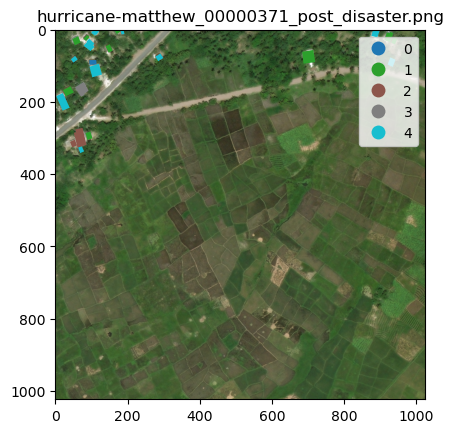

In [15]:
# post on post

print("post label on post image")
#img_path = os.path.join(xbd_tif_directory, tif_hurricane[1])

with rio.open(post_image_path) as img:
    #show(img)
    #img_extent=[img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
    
    f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
    ax = rio.plot.show(img.read(), ax=ax)
    ax.ticklabel_format(useOffset=False)
    
    post_image_df.plot(ax=ax, column = "damage_class", legend = True)
    ax.set_title(post_image_name)
    #data = img.read()

post label on pre image


[10:29:08] DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87c58d97e0>                    ]8;id=235868;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=188151;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=30035;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=112215;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=677386;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=903181;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87b282d180> created        ]8;id=237562;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=80544;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=241974;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=419591;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=590626;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=474527;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87b282d180>.              ]8;id=518356;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=101481;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87c58d97e0>                     ]8;id=627214;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=579075;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Sharing flag: 0                                                                 ]8;id=769070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=217698;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=168672;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=11661;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=288130;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=215078;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=400451;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=217110;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Dataset <open DatasetReader                                                     ]8;id=378630;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=358206;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\
                    name='/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_da                
                    ta/geotiffs.old/hold/images/hurricane-florence_00000050_post_disaster.tif'                     
                    mode='r'> is started.                                                                          

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87c58d97e0>                     ]8;id=954832;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=963309;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87b282d180> options            ]8;id=902106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=397930;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87b282d180>.                    ]8;id=749369;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=327885;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=948543;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=96449;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87c58d97e0>                      ]8;id=359936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=855610;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87c539f520>                    ]8;id=233585;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=751235;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=738163;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=992468;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=127115;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=378857;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87b42212a0> created        ]8;id=727776;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=991484;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=857280;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=326343;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=722421;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=20093;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87b42212a0>.              ]8;id=603135;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=889016;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87c539f520>                     ]8;id=345029;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=21913;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Output nodata value read from file: -99.0                                       ]8;id=864542;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=935360;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    Output nodata value read from file: -99.0                                       ]8;id=39059;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=506273;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    Output nodata value read from file: -99.0                                       ]8;id=119629;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=600785;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    Output nodata values: [-99.0, -99.0, -99.0]                                     ]8;id=811756;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=841746;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    all_valid: False                                                                ]8;id=564304;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=374381;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    mask_flags: ([<MaskFlags.nodata: 8>], [<MaskFlags.nodata: 8>],                  ]8;id=575957;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=311508;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\
                    [<MaskFlags.nodata: 8>])                                                                       

           DEBUG    Jump straight to _read()                                                        ]8;id=470180;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=436951;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    Window: None                                                                    ]8;id=60535;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=443759;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

           DEBUG    IO window xoff=0.0 yoff=0.0 width=1024.0 height=1024.0                          ]8;id=273092;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py\4113699456.py]8;;\:]8;id=169963;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/4113699456.py#9\9]8;;\

/Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/geopandas/plotting.py:807: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87c539f520>                     ]8;id=690312;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=381365;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87b42212a0> options            ]8;id=702210;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=730699;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87b42212a0>.                    ]8;id=73471;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=99525;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=921493;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=613253;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87c539f520>                      ]8;id=73612;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=813826;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

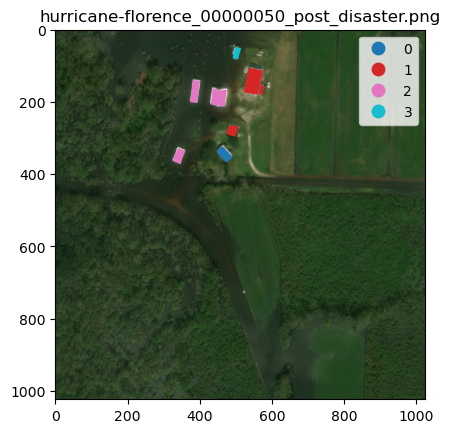

In [17]:
# post on pre
print("post label on pre image")
with rio.open(pre_image_path) as img:
    #show(img)
    #img_extent=[img.bounds[0], img.bounds[2], img.bounds[1], img.bounds[3]]
    
    f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
    ax = rio.plot.show(img.read(), ax=ax)
    ax.ticklabel_format(useOffset=False)
    
    pre_image_df.plot(ax=ax, column = "damage_class", legend = True)
    ax.set_title(pre_image_name)
    #data = img.read()

In [ ]:
from torchvision.transforms.functional import crop

def crop800(image):
    return crop(image, 0, 0, 800, 800)

data_transforms = {
    'images': transforms.Compose([transforms.ToTensor(),
                                  transforms.Lambda(crop800),
                                  transforms.Resize((400, 400))])}

In [18]:
import torch
import torchvision.transforms as transforms
from PIL import Image

In [24]:
pre_image_path
pre_image_df

import random
import rasterio
from rasterio.windows import Window

with rio.open(pre_image_path) as img:
    xsize, ysize = 240, 240
    
    xmin, xmax = 0, img.width - xsize
    ymin, ymax = 0, img.height - ysize
    xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)
    
    window = Window(xoff, yoff, xsize, ysize)
    transform = img.window_transform(window)
    
    # Create a new cropped raster to write to
    profile = img.profile
    profile.update({
        'height': xsize,
        'width': ysize,
        'transform': transform})
    
    
    save_path = os.path.join(xbd_dir, 'output.tif')
    with rasterio.open(save_path, 'w', **profile) as dst:
        # Read the data from the window and write it to the output raster
        dst.write(img.read(window=window))
    
    #transform = transforms.CenterCrop((180, 300))
    #image_crop = transform(img)
    #image_crop.show()
    
    
    #f, ax = plt.subplots()
    #ax = rio.plot.show(img.read(), ax=ax, extent = img_extent)
   # ax = rio.plot.show(img.read(), ax=ax)
   # ax.ticklabel_format(useOffset=False)
    
   # pre_image_df.plot(ax=ax, column = "damage_class", legend = True)
   # ax.set_title(pre_image_name)
    #data = img.read()

[10:40:40] DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87c58a9d20>                    ]8;id=978458;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=910226;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=627624;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=96357;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=950977;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=652634;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87b449f490> created        ]8;id=896613;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=134119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=307031;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=730554;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=603864;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=57304;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87b449f490>.              ]8;id=54705;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=985223;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87c58a9d20>                     ]8;id=154924;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=790366;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Sharing flag: 0                                                                 ]8;id=288132;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=243698;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=971290;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=307004;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=106398;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=321924;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=472170;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=832114;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Dataset <open DatasetReader                                                     ]8;id=219871;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=208703;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\
                    name='/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_da                
                    ta/geotiffs.old/hold/images/hurricane-florence_00000050_post_disaster.tif'                     
                    mode='r'> is started.                                                                          

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87c58a9d20>                     ]8;id=210245;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=926323;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87b449f490> options            ]8;id=430751;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=299959;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87b449f490>.                    ]8;id=499974;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=148217;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=364327;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=207932;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87c58a9d20>                      ]8;id=763698;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=493903;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87b449f490>                    ]8;id=25020;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=212229;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=513813;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=138570;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=178092;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=225877;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87b4255ed0> created        ]8;id=894349;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=110655;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=832861;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=961337;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=570566;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=191563;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87b4255ed0>.              ]8;id=863872;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=730830;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87b449f490>                     ]8;id=160052;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=384182;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Got a copy of environment <rasterio._env.GDALEnv object at 0x7f87b4255ed0> options   ]8;id=810099;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=982543;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#320\320]8;;\

           DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87b449f160>                    ]8;id=970580;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=82119;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Got a copy of environment <rasterio._env.GDALEnv object at 0x7f87b4255ed0> options   ]8;id=925353;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=458689;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#320\320]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87b449f160>                     ]8;id=305330;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=646281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Path:                                                                           ]8;id=527060;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=594316;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\
                    UnparsedPath(path='/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/da                
                    tasets/xBD_data/output.tif'), mode: w, driver: GTiff                                           

           DEBUG    Option: ('INTERLEAVE', b'pixel')                                                ]8;id=56814;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=769477;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\

           DEBUG    Skipped delete for overwrite. Dataset does not exist:                           ]8;id=986655;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=41821;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\
                    '/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_data/ou                
                    tput.tif'                                                                                      

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=111189;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=867736;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=713411;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=392007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=835587;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=10840;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#230\230]8;;\

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87b449f160>                     ]8;id=590267;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=471344;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87b4255ed0> options            ]8;id=393339;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=554404;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87b4255ed0>.                    ]8;id=310677;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=85320;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=545365;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=280995;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87b4255ed0> created        ]8;id=808090;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=289954;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=6781;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=266257;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=685974;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=813104;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87b4255ed0>.              ]8;id=346760;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=442007;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87b449f160>                      ]8;id=581046;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=698317;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=880647;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=226889;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=429208;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=744050;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    Output nodata value read from file: -99.0                                      ]8;id=287887;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=722039;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    Output nodata values: [-99.0, -99.0, -99.0]                                    ]8;id=161375;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=332633;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    all_valid: False                                                               ]8;id=807967;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=597817;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    mask_flags: ([<MaskFlags.nodata: 8>], [<MaskFlags.nodata: 8>],                 ]8;id=97873;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=448291;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\
                    [<MaskFlags.nodata: 8>])                                                                       

           DEBUG    Jump straight to _read()                                                       ]8;id=450494;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=131710;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    Window: Window(col_off=573, row_off=559, width=240, height=240)                ]8;id=99302;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=758137;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    IO window xoff=573.0 yoff=559.0 width=240.0 height=240.0                       ]8;id=859974;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py\2434799766.py]8;;\:]8;id=958252;file:///var/folders/nn/7hvkdmmn3c15btn2lqvyf2800000gq/T/ipykernel_43720/2434799766.py#29\29]8;;\

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87b449f490>                     ]8;id=222039;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=748646;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87b4255ed0> options            ]8;id=856487;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=626823;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87b4255ed0>.                    ]8;id=653002;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=764386;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=873936;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=723779;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87b449f490>                      ]8;id=843456;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=546846;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

In [27]:
path = os.path.join(xbd_dir, 'output.tif')
with rio.open(path) as img:
    img.show()

[10:43:05] DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87a11ba710>                    ]8;id=185972;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=966076;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=402823;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=784814;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=12137;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=642784;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87c5865ff0> created        ]8;id=858456;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=551960;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=379045;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=248634;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=312564;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=36375;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87c5865ff0>.              ]8;id=52815;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=171241;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87a11ba710>                     ]8;id=387753;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=289481;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Sharing flag: 0                                                                 ]8;id=478774;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=560706;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=243045;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=416916;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=878894;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=238703;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Nodata success: 1, Nodata value: -99.000000                                     ]8;id=199931;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=83281;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\

           DEBUG    Dataset <open DatasetReader                                                     ]8;id=301637;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py\__init__.py]8;;\:]8;id=36682;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/__init__.py#220\220]8;;\
                    name='/Users/Lisanne/Documents/AI4ER/hurricane-harm-herald/data/datasets/xBD_da                
                    ta/output.tif' mode='r'> is started.                                                           

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87a11ba710>                     ]8;id=898892;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=522866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87c5865ff0> options            ]8;id=844022;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=255858;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87c5865ff0>.                    ]8;id=593106;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=967416;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=540349;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=59325;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87a11ba710>                      ]8;id=53562;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=324917;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

           DEBUG    Entering env context: <rasterio.env.Env object at 0x7f87c58a9d50>                    ]8;id=101107;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=73604;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#258\258]8;;\

           DEBUG    Starting outermost env                                                               ]8;id=198970;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=263880;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#260\260]8;;\

           DEBUG    No GDAL environment exists                                                           ]8;id=111807;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=984848;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#307\307]8;;\

           DEBUG    New GDAL environment <rasterio._env.GDALEnv object at 0x7f87c5867430> created        ]8;id=828313;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=472582;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#310\310]8;;\

           DEBUG    GDAL_DATA found in environment.                                                      ]8;id=427716;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=127323;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    PROJ_LIB found in environment.                                                       ]8;id=72054;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=344425;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Started GDALEnv: self=<rasterio._env.GDALEnv object at 0x7f87c5867430>.              ]8;id=850647;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=391981;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#312\312]8;;\

           DEBUG    Entered env context: <rasterio.env.Env object at 0x7f87c58a9d50>                     ]8;id=176882;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=387746;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#282\282]8;;\

           DEBUG    Exiting env context: <rasterio.env.Env object at 0x7f87c58a9d50>                     ]8;id=857210;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=500403;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#286\286]8;;\

           DEBUG    Cleared existing <rasterio._env.GDALEnv object at 0x7f87c5867430> options            ]8;id=51866;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=111173;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#347\347]8;;\

           DEBUG    Stopped GDALEnv <rasterio._env.GDALEnv object at 0x7f87c5867430>.                    ]8;id=217495;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=683220;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#348\348]8;;\

           DEBUG    Exiting outermost env                                                                ]8;id=221341;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=956070;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#292\292]8;;\

           DEBUG    Exited env context: <rasterio.env.Env object at 0x7f87c58a9d50>                      ]8;id=540593;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py\env.py]8;;\:]8;id=721937;file:///Users/Lisanne/opt/anaconda3/envs/gtc/lib/python3.10/site-packages/rasterio/env.py#299\299]8;;\

AttributeError: 'DatasetReader' object has no attribute 'show'